# CRIME PREDICTION WITH MACHINE LEARNING


<!-- ### <span style="color:Red"> 1. Use the markdwon with section, subsection, subsubsection to organise your notebook</span>
 -->

### 0.0 Libraries Needed

In [1]:
# import operating system library
import os
# data manipulation library
import pandas as pd

# numerical analysis library
import numpy as np

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
import warnings
warnings.filterwarnings("ignore")

### 1.0 Data Acquisition for Dependent Features

In [2]:
# acquiring the dataset from the source and showing a little brief of its details.
data_2022_1 = pd.read_csv("./data/police_data/2022-01/2022-01-humberside-street.csv")
data_2022_1

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,36947a3b5ab7d934131d410c34ab26c519a8c4b8282c2a...,2022-01,Humberside Police,Humberside Police,-1.468574,53.531548,On or near Thomas Street,E01007463,Barnsley 021F,Other crime,Action to be taken by another organisation,NaN
1,NaN,2022-01,Humberside Police,Humberside Police,-1.466500,54.469116,On or near Sockburn Lane,E01012338,Darlington 015A,Anti-social behaviour,NaN,NaN
2,83144b441ac439b3eacdf1d76f540912e4cac4e3d930c1...,2022-01,Humberside Police,Humberside Police,-0.957546,53.657785,On or near Johnny Moor Long Lane,E01007632,Doncaster 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
3,13d9478ab66f4e24039f1b8e9c5978802fc246c864177a...,2022-01,Humberside Police,Humberside Police,-0.951286,53.606369,On or near Fenland Road,E01007642,Doncaster 003G,Other crime,Unable to prosecute suspect,NaN
4,6a7d368b7e973b021bea99a9600b6c3226452dad860bc2...,2022-01,Humberside Police,Humberside Police,-0.215495,54.110420,On or near Scarborough Road,E01012934,East Riding of Yorkshire 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7996,8f3cc5353731e74853664423046147fbb16e483abd717a...,2022-01,Humberside Police,Humberside Police,-0.777385,53.491719,On or near Croft'S Lane,E01013253,North Lincolnshire 023D,Vehicle crime,Investigation complete; no suspect identified,NaN
7997,db68742f82d85a1d83fa7f8b7351bc842baa0d9b59962b...,2022-01,Humberside Police,Humberside Police,-0.753623,53.555646,On or near M180,E01013253,North Lincolnshire 023D,Violence and sexual offences,Investigation complete; no suspect identified,NaN
7998,b550a2f20d2729aae02bb058a085d68ddee551a695b955...,2022-01,Humberside Police,Humberside Police,-0.781282,53.494042,On or near Gashouse Lane,E01013253,North Lincolnshire 023D,Violence and sexual offences,Unable to prosecute suspect,NaN
7999,e59bfce81e2360146322b3d8d0a6ecc580989c48daf626...,2022-01,Humberside Police,Humberside Police,-0.776328,53.490189,On or near Silver Street,E01013253,North Lincolnshire 023D,Violence and sexual offences,Unable to prosecute suspect,NaN


#### 1.1 Data Checks

In [3]:
data_2022_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               7071 non-null   object 
 1   Month                  8001 non-null   object 
 2   Reported by            8001 non-null   object 
 3   Falls within           8001 non-null   object 
 4   Longitude              8001 non-null   float64
 5   Latitude               8001 non-null   float64
 6   Location               8001 non-null   object 
 7   LSOA code              8001 non-null   object 
 8   LSOA name              8001 non-null   object 
 9   Crime type             8001 non-null   object 
 10  Last outcome category  7071 non-null   object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 750.2+ KB


In [4]:
data_2022_1.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [5]:
data_2022_1.shape

(8001, 12)

#### 1.2 Loop through to combine all Police data together

<!-- ### <span style="color:Red"> 2. be careful: you should only put the police data in data folder, there are lots of other data in the data would crash this fucntion ---> I create a police data folder for code testing here</span> -->

In [6]:
# write a function that can loop through the csv files in a folder with the same data format and concatenate them together.

def concatenate_csv_files_in_subfolders(main_folder_path):
   
    df_list = []

    for root, _, files in os.walk(main_folder_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                df_list.append(df)

    concatenated_df = pd.concat(df_list, ignore_index=True)
    return concatenated_df

# Example usage
main_folder_path = './data/police_data'
police_df = concatenate_csv_files_in_subfolders(main_folder_path)
police_df


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,adcf299f64b3c2d3bb0109777b14fad944be5eae4007b6...,2023-10,Humberside Police,Humberside Police,-0.252334,51.598723,On or near Shellduck Close,E01000131,Barnet 024E,Violence and sexual offences,Status update unavailable,NaN
1,7bb9c517e8f3d59d4ec22d6b9916f15b157e219b98b351...,2023-10,Humberside Police,Humberside Police,-3.518861,54.518348,On or near Longbarrow,E01019267,Copeland 004F,Violence and sexual offences,Status update unavailable,NaN
2,b130c4bfbd6acd2dfb4c3a19d79e74ca7ed23649abdc9e...,2023-10,Humberside Police,Humberside Police,-1.025684,53.585631,On or near St. Edwin Reach,E01007563,Doncaster 006F,Violence and sexual offences,Unable to prosecute suspect,NaN
3,b1b89d18a493e7c07b67dc87983e0ad7e52f0a32e9e6d3...,2023-10,Humberside Police,Humberside Police,-0.962368,53.590807,On or near Parking Area,E01007559,Doncaster 008D,Criminal damage and arson,Unable to prosecute suspect,NaN
4,46418b65f71c3a28a6d7d4879ae619997bba94dd349a57...,2023-10,Humberside Police,Humberside Police,-1.270288,53.494827,On or near Hewitt Street,E01007579,Doncaster 030C,Robbery,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240357,67851f03219588d473336b067c5adf2b4ad811e72449f8...,2023-07,Humberside Police,Humberside Police,-0.746565,53.543158,On or near Christopher'S Meadow,E01013253,North Lincolnshire 023D,Violence and sexual offences,Unable to prosecute suspect,NaN
240358,f33a0eb441b2ff41ca9e5f11a7e38525e3afb258832ca9...,2023-07,Humberside Police,Humberside Police,-0.780693,53.492517,On or near Temperton'S Lane,E01013253,North Lincolnshire 023D,Violence and sexual offences,Unable to prosecute suspect,NaN
240359,d74f69176b01f9a50caa34d1e1b2e4a9f123cd19428d64...,2023-07,Humberside Police,Humberside Police,-0.775559,53.486019,On or near South Street,E01013253,North Lincolnshire 023D,Violence and sexual offences,Unable to prosecute suspect,NaN
240360,228b3a7ae049d06d26da0500d64ab58bf9d950d3de31c5...,2023-07,Humberside Police,Humberside Police,-0.751275,53.543118,On or near Park View Terrace Paddock Lane,E01013253,North Lincolnshire 023D,Violence and sexual offences,Status update unavailable,NaN


In [7]:
#checking for the unique value in the lsoa
police_df["LSOA name"].unique()


array(['Barnet 024E', 'Copeland 004F', 'Doncaster 006F', 'Doncaster 008D',
       'Doncaster 030C', 'East Lindsey 001E', 'East Lindsey 005C',
       'East Riding of Yorkshire 001A', 'East Riding of Yorkshire 001B',
       'East Riding of Yorkshire 001D', 'East Riding of Yorkshire 001E',
       'East Riding of Yorkshire 001F', 'East Riding of Yorkshire 001G',
       'East Riding of Yorkshire 002A', 'East Riding of Yorkshire 002B',
       'East Riding of Yorkshire 002C', 'East Riding of Yorkshire 002D',
       'East Riding of Yorkshire 002E', 'East Riding of Yorkshire 003A',
       'East Riding of Yorkshire 003B', 'East Riding of Yorkshire 003C',
       'East Riding of Yorkshire 003D', 'East Riding of Yorkshire 003E',
       'East Riding of Yorkshire 004A', 'East Riding of Yorkshire 004B',
       'East Riding of Yorkshire 004C', 'East Riding of Yorkshire 004D',
       'East Riding of Yorkshire 005A', 'East Riding of Yorkshire 005B',
       'East Riding of Yorkshire 005C', 'East Riding of

In [8]:
#checking for the unique value in the type of crime
police_df["Crime type"].unique()

array(['Violence and sexual offences', 'Criminal damage and arson',
       'Robbery', 'Anti-social behaviour', 'Other theft', 'Shoplifting',
       'Other crime', 'Burglary', 'Public order', 'Drugs',
       'Possession of weapons', 'Vehicle crime', 'Bicycle theft',
       'Theft from the person'], dtype=object)

<!-- ### <span style="color:Red"> 3. you only select Burglary, so keep in mind your crime type is not property crime but only the burglary for strong telling in the report</span> -->

#### 1.3 Filter out the crime type to be property type and lsoa name to be kingston upon hull

In [9]:
#filtering out the crime type to be burglary alone
police_df = police_df[police_df['Crime type'] ==  'Burglary']
police_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
45,b4220d8bcee8700c0f09f7d07fa9af2be6293345053959...,2023-10,Humberside Police,Humberside Police,-0.198602,54.099921,On or near Balmoral Close,E01012941,East Riding of Yorkshire 001F,Burglary,Investigation complete; no suspect identified,NaN
49,db7f127083a9735c42136541f018181fb8e41a6b540302...,2023-10,Humberside Police,Humberside Police,-0.204431,54.105887,On or near Eleanor Avenue,E01034752,East Riding of Yorkshire 001G,Burglary,Investigation complete; no suspect identified,NaN
50,96f868e3030e0c79727a6659e9cca996139560fa470c15...,2023-10,Humberside Police,Humberside Police,-0.204431,54.105887,On or near Eleanor Avenue,E01034752,East Riding of Yorkshire 001G,Burglary,Status update unavailable,NaN
87,93bcb3426e391059889d1b3df48d3d2d8d44d9af63bc7f...,2023-10,Humberside Police,Humberside Police,-0.112521,54.124598,On or near Thornwick Road,E01012937,East Riding of Yorkshire 002D,Burglary,Status update unavailable,NaN
123,64942028616eeb0203d3a2903434a2bc7447302c7321a6...,2023-10,Humberside Police,Humberside Police,-0.207805,54.093281,On or near High Street,E01012931,East Riding of Yorkshire 003B,Burglary,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
240273,736d8c01833fc8c12a2e36644d3d444f7d61bd1406fcb1...,2023-07,Humberside Police,Humberside Police,-0.829907,53.527589,On or near Nicholson Way,E01013243,North Lincolnshire 020C,Burglary,Unable to prosecute suspect,NaN
240291,4ff60ea36fc799c6bf0c3cff58fe7172bec7d7c66f6941...,2023-07,Humberside Police,Humberside Police,-0.608331,53.550376,On or near Holme Lane,E01013324,North Lincolnshire 021A,Burglary,Investigation complete; no suspect identified,NaN
240292,68fac831eb75f3d912ef27f553dc154cae3e1968b76556...,2023-07,Humberside Police,Humberside Police,-0.578668,53.552239,On or near Mortal Ash Hill,E01013324,North Lincolnshire 021A,Burglary,Investigation complete; no suspect identified,NaN
240315,5fc7a39235578cff27843f80a530556943a1a05548fe56...,2023-07,Humberside Police,Humberside Police,-0.584908,53.472857,On or near Mill Lane,E01013323,North Lincolnshire 022B,Burglary,Investigation complete; no suspect identified,NaN


In [10]:
# Filtering the dataframe to include only rows where 'Hull' appears in 'LSOA name'
police_df = police_df[police_df['LSOA name'].str.contains('Hull')]
police_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
2067,2f550856cc5f2cd3f07c4f0ebcea88b7814c90cddcf6e6...,2023-10,Humberside Police,Humberside Police,-0.335230,53.788680,On or near Davidstow Close,E01012785,Kingston upon Hull 002B,Burglary,Investigation complete; no suspect identified,NaN
2082,61d5f5d5ea565450d45842194651feb6b1e2a807efc8fe...,2023-10,Humberside Police,Humberside Police,-0.334913,53.794761,On or near Malpas Close,E01012786,Kingston upon Hull 002C,Burglary,Investigation complete; no suspect identified,NaN
2107,ab4cc558163d3d121d9648dc1c5004ebefeb458e7fb356...,2023-10,Humberside Police,Humberside Police,-0.321360,53.787408,On or near Hospital,E01012787,Kingston upon Hull 002D,Burglary,Investigation complete; no suspect identified,NaN
2108,bd8f8de44b71d53725e8f9777594a081a408e9dfb641e6...,2023-10,Humberside Police,Humberside Police,-0.321537,53.786413,On or near Shopping Area,E01012787,Kingston upon Hull 002D,Burglary,Unable to prosecute suspect,NaN
2109,154ee26b921a76ad24fb9c31cc2ede1af6c5cbcaf1386c...,2023-10,Humberside Police,Humberside Police,-0.322720,53.789863,On or near Dalwood Close,E01012787,Kingston upon Hull 002D,Burglary,Investigation complete; no suspect identified,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
237025,3cb79118e3aa235f7258267111cded17823ba5f5397bbe...,2023-07,Humberside Police,Humberside Police,-0.349460,53.801282,On or near Parish Mews,E01035471,Kingston upon Hull 035B,Burglary,Unable to prosecute suspect,NaN
237038,69c570528a9dc6180f10f291255b5781b321ad8499eab4...,2023-07,Humberside Police,Humberside Police,-0.341493,53.798071,On or near Ferry Meadow Park,E01033105,Kingston upon Hull 035D,Burglary,Investigation complete; no suspect identified,NaN
237039,5f3fb87885adf91d5535a1629963711b0268d5ce56e17b...,2023-07,Humberside Police,Humberside Police,-0.346269,53.794557,On or near Supermarket,E01033105,Kingston upon Hull 035D,Burglary,Investigation complete; no suspect identified,NaN
237040,f3d99fe75dd357c3277fc03aff1d462e70f65a895474e8...,2023-07,Humberside Police,Humberside Police,-0.347889,53.795045,On or near Shopping Area,E01033105,Kingston upon Hull 035D,Burglary,Investigation complete; no suspect identified,NaN


In [11]:
# getting the shape of the dataframe
police_df.shape

(5307, 12)

In [12]:
# getting the information of this data including the data types 
police_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5307 entries, 2067 to 237041
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               5307 non-null   object 
 1   Month                  5307 non-null   object 
 2   Reported by            5307 non-null   object 
 3   Falls within           5307 non-null   object 
 4   Longitude              5307 non-null   float64
 5   Latitude               5307 non-null   float64
 6   Location               5307 non-null   object 
 7   LSOA code              5307 non-null   object 
 8   LSOA name              5307 non-null   object 
 9   Crime type             5307 non-null   object 
 10  Last outcome category  5307 non-null   object 
 11  Context                0 non-null      float64
dtypes: float64(3), object(9)
memory usage: 539.0+ KB


<!-- ### <span style="color:Red"> 4. drop 2024-01, just from 2022-01 to 2023-12</span> -->

In [13]:
#sorting out the police month unique values
np.sort(police_df.Month.unique())

array(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype=object)

### 2.0 Data Acquisition for Independent Features

In [14]:
# importing geopandas library we will dealing with more of geographic features now!
import geopandas as gpd

#### 2.1 Open Street Map Data Collection

<!-- ### <span style="color:Red"> 5. Each geoshp should be processed separately, you cannot contact them together, as there are points, polygons and line string from OSM data</span> -->

#### 2.1.1 Buildings(Polygon)

<!-- ### <span style="color:Red"> 6. When you get a shp, you need to ask yourself what kind of info can I link to the grids (the spatial units of analysis), here, for example, the info of type in buildings can be used to characterise the environment for each "GRID"! </span> -->

In [15]:
#Acquiring Geospatial data for buildings in an osm map
osm_data_buildings = gpd.read_file('./data/hull-shapefile/gis_osm_buildings_a_free_1.shp')
osm_data_buildings

,osm_id,code,fclass,name,type,geometry
0,5935388,1500,building,Asda,store,"POLYGON ((-0.37397 53.73364, -0.37379 53.73365..."
1,8761733,1500,building,Sainsbury's,supermarket,"POLYGON ((-0.42159 53.72325, -0.42004 53.72366..."
2,14368870,1500,building,B&Q,None,"POLYGON ((-0.38144 53.72608, -0.38115 53.72615..."
3,14368871,1500,building,None,block,"POLYGON ((-0.37882 53.72691, -0.37770 53.72717..."
4,14368872,1500,building,Makro,None,"POLYGON ((-0.38465 53.72560, -0.38345 53.72586..."
...,...,...,...,...,...,...
200925,1291055193,1500,building,None,house,"POLYGON ((-0.26984 53.83763, -0.26974 53.83767..."
200926,1291055194,1500,building,None,house,"POLYGON ((-0.26968 53.83769, -0.26958 53.83772..."
200927,1291055195,1500,building,None,house,"POLYGON ((-0.26955 53.83774, -0.26945 53.83777..."
200928,1291055196,1500,building,None,house,"POLYGON ((-0.26938 53.83779, -0.26929 53.83783..."


In [16]:
# checking unique properties of buildings available on osm geospatial file
osm_data_buildings['type'].unique()

array(['store', 'supermarket', None, 'block', 'warehouse', 'public',
       'church', 'office', 'apartments', 'pavilion', 'stadium', 'hall',
       'retail', 'roof', 'commercial', 'detached', 'museum', 'school',
       'sports_centre', 'industrial', 'residential', 'prison',
       'university', 'hotel', 'house', 'hospital', 'shed', 'glasshouse',
       'garage', 'train_station', 'hangar', 'stables', 'government',
       'farm_auxiliary', 'service', 'college', 'palace', 'farm',
       'toilets', 'sport', 'leisure', 'mixed', 'collapsed', 'greenhouse',
       'lychgate', 'corridor', 'storage_tank', 'kindergarten',
       'clubhouse', 'semidetached_house', 'fire_station', 'terrace',
       'hut', 'manufacture', 'pumping_station', 'temple', 'pub', 'shop',
       'storage', 'cabin', 'ship', 'civic', 'garages', 'dormitory',
       'chapel', 'tank', 'barn', 'stable', 'mill', 'ruins', 'silo',
       'Moatfield_Farm', 'chalet', 'signal_box', 'historic', 'kennels',
       'shelter', 'bungalow', '

In [17]:
osm_data_buildings["centroid"] =  osm_data_buildings["geometry"].centroid
osm_data_buildings

,osm_id,code,fclass,name,type,geometry,centroid
0,5935388,1500,building,Asda,store,"POLYGON ((-0.37397 53.73364, -0.37379 53.73365...",POINT (-0.37307 53.73350)
1,8761733,1500,building,Sainsbury's,supermarket,"POLYGON ((-0.42159 53.72325, -0.42004 53.72366...",POINT (-0.42059 53.72319)
2,14368870,1500,building,B&Q,None,"POLYGON ((-0.38144 53.72608, -0.38115 53.72615...",POINT (-0.38014 53.72628)
3,14368871,1500,building,None,block,"POLYGON ((-0.37882 53.72691, -0.37770 53.72717...",POINT (-0.37707 53.72708)
4,14368872,1500,building,Makro,None,"POLYGON ((-0.38465 53.72560, -0.38345 53.72586...",POINT (-0.38375 53.72524)
...,...,...,...,...,...,...,...
200925,1291055193,1500,building,None,house,"POLYGON ((-0.26984 53.83763, -0.26974 53.83767...",POINT (-0.26974 53.83760)
200926,1291055194,1500,building,None,house,"POLYGON ((-0.26968 53.83769, -0.26958 53.83772...",POINT (-0.26958 53.83766)
200927,1291055195,1500,building,None,house,"POLYGON ((-0.26955 53.83774, -0.26945 53.83777...",POINT (-0.26946 53.83771)
200928,1291055196,1500,building,None,house,"POLYGON ((-0.26938 53.83779, -0.26929 53.83783...",POINT (-0.26928 53.83776)


#### 2.1.2 Point Of Interest(polygon)

In [18]:
#Acquiring point of interest data from the osm geospatial file
osm_data_poly_poi = gpd.read_file('./data/hull-shapefile/gis_osm_pois_a_free_1.shp')
osm_data_poly_poi

,osm_id,code,fclass,name,geometry
0,4214242,2733,archaeological,Archbishop's Palace (site of),"POLYGON ((-0.78228 53.98828, -0.78208 53.98839..."
1,4389769,2961,wastewater_plant,Bishop Wilton/STW,"POLYGON ((-0.79347 53.97946, -0.79292 53.98013..."
2,5935388,2501,supermarket,Asda,"POLYGON ((-0.37397 53.73364, -0.37379 53.73365..."
3,7849820,2255,golf_course,Springhead Golf Course,"POLYGON ((-0.42917 53.75845, -0.42774 53.75864..."
4,7850857,2255,golf_course,Hull Golf Club,"POLYGON ((-0.46986 53.75491, -0.46957 53.75494..."
...,...,...,...,...,...
3379,1290444496,2252,pitch,None,"POLYGON ((-0.19331 53.75254, -0.19257 53.75260..."
3380,1290444497,2252,pitch,None,"POLYGON ((-0.19486 53.75167, -0.19427 53.75171..."
3381,1290444498,2252,pitch,None,"POLYGON ((-0.19496 53.75077, -0.19413 53.75083..."
3382,1290444499,2258,track,None,"POLYGON ((-0.19227 53.75142, -0.19225 53.75147..."


In [19]:
#checking for the unique class of the point of interest data
osm_data_poly_poi.fclass.unique()

array(['archaeological', 'wastewater_plant', 'supermarket', 'golf_course',
       'school', 'doityourself', 'ice_rink', 'cinema', 'restaurant',
       'pharmacy', 'pitch', 'sports_centre', 'playground', 'graveyard',
       'park', 'stadium', 'university', 'department_store', 'clothes',
       'college', 'caravan_site', 'fountain', 'mall', 'attraction',
       'library', 'water_works', 'track', 'dog_park', 'museum',
       'water_tower', 'prison', 'theatre', 'hotel', 'chalet', 'police',
       'doctors', 'fast_food', 'pub', 'hospital', 'arts_centre',
       'courthouse', 'picnic_site', 'fire_station', 'convenience',
       'garden_centre', 'car_wash', 'toilet', 'hairdresser',
       'community_centre', 'veterinary', 'newsagent', 'beauty_shop',
       'bicycle_shop', 'cafe', 'butcher', 'post_office', 'swimming_pool',
       'camp_site', 'bar', 'bakery', 'laundry', 'bank', 'recycling',
       'castle', 'car_dealership', 'kiosk', 'town_hall', 'dentist',
       'guesthouse', 'ruins', 'recyc

#### 2.1.2 Point Of Interest(point)

In [20]:
#Acquiring point of interest data from the osm geospatial file
osm_data_point_poi = gpd.read_file('./data/hull-shapefile/gis_osm_pois_free_1.shp')
osm_data_point_poi

,osm_id,code,fclass,name,geometry
0,14071521,2304,pub,Fleece Inn,POINT (-0.78562 53.98536)
1,14653528,2511,convenience,Bishop Wilton Community Shop,POINT (-0.78486 53.98551)
2,14653529,2004,post_box,None,POINT (-0.78498 53.98560)
3,14957352,2902,bench,None,POINT (-0.76792 53.98828)
4,25990971,2304,pub,Wellington,POINT (-0.52390 53.92000)
...,...,...,...,...,...
4550,11929292813,2521,gift_shop,Willow Tree Gifts,POINT (-0.91390 53.99090)
4551,11933900102,2602,atm,None,POINT (-0.25268 53.77841)
4552,11935410780,2906,waste_basket,None,POINT (-0.25798 53.77868)
4553,11935410796,2906,waste_basket,None,POINT (-0.25323 53.77906)


In [21]:
#checking for the unique class of the point of interest data
osm_data_point_poi.fclass.unique()

array(['pub', 'convenience', 'post_box', 'bench', 'toilet',
       'sports_centre', 'community_centre', 'library', 'telephone',
       'hotel', 'tourist_info', 'monument', 'attraction', 'cafe', 'atm',
       'garden_centre', 'hospital', 'motel', 'memorial', 'restaurant',
       'post_office', 'water_tower', 'doctors', 'car_dealership',
       'police', 'pharmacy', 'recycling', 'fountain', 'veterinary',
       'playground', 'swimming_pool', 'school', 'dentist', 'lighthouse',
       'beverages', 'fast_food', 'bicycle_shop', 'town_hall', 'bank',
       'bar', 'recycling_glass', 'nightclub', 'museum', 'picnic_site',
       'fire_station', 'clinic', 'windmill', 'guesthouse', 'gift_shop',
       'camp_site', 'newsagent', 'vending_parking', 'castle',
       'public_building', 'butcher', 'bakery', 'kindergarten',
       'doityourself', 'supermarket', 'camera_surveillance', 'viewpoint',
       'jeweller', 'car_rental', 'travel_agent', 'waste_basket', 'cinema',
       'artwork', 'market_place', 

#### 2.1.3 Land use

In [22]:
#Acquiring the land use data 
osm_data_land_use = gpd.read_file('./data/hull-shapefile/gis_osm_landuse_a_free_1.shp')
osm_data_land_use

,osm_id,code,fclass,name,geometry
0,3282540,7214,quarry,None,"POLYGON ((-0.77468 53.99335, -0.77467 53.99351..."
1,3282573,7201,forest,Crow Wood,"POLYGON ((-0.77125 53.99053, -0.77105 53.99108..."
2,3419230,7207,allotments,None,"POLYGON ((-0.78208 53.98938, -0.78169 53.98946..."
3,3419231,7211,recreation_ground,Bishop Wilton Playing Fields,"POLYGON ((-0.78458 53.98950, -0.78249 53.98983..."
4,6180385,7214,quarry,Melton Bottom Quarry,"POLYGON ((-0.53843 53.74003, -0.53757 53.74126..."
...,...,...,...,...,...
37926,1289640324,7218,grass,None,"POLYGON ((-0.19507 53.76706, -0.19505 53.76707..."
37927,1289640325,7218,grass,None,"POLYGON ((-0.19468 53.76689, -0.19462 53.76690..."
37928,1289640326,7218,grass,None,"POLYGON ((-0.19524 53.76715, -0.19518 53.76719..."
37929,1289640327,7218,grass,None,"POLYGON ((-0.19495 53.76716, -0.19476 53.76706..."


In [23]:
#checking for the unique class of the land use data
osm_data_land_use.fclass.unique()

array(['quarry', 'forest', 'allotments', 'recreation_ground',
       'industrial', 'heath', 'residential', 'nature_reserve', 'retail',
       'military', 'commercial', 'cemetery', 'park', 'grass', 'scrub',
       'farmland', 'meadow', 'farmyard', 'orchard', 'vineyard'],
      dtype=object)

In [24]:
osm_data_land_use["centroid"] = osm_data_land_use["geometry"].centroid
osm_data_land_use

,osm_id,code,fclass,name,geometry,centroid
0,3282540,7214,quarry,None,"POLYGON ((-0.77468 53.99335, -0.77467 53.99351...",POINT (-0.77371 53.99367)
1,3282573,7201,forest,Crow Wood,"POLYGON ((-0.77125 53.99053, -0.77105 53.99108...",POINT (-0.77015 53.99116)
2,3419230,7207,allotments,None,"POLYGON ((-0.78208 53.98938, -0.78169 53.98946...",POINT (-0.78150 53.98910)
3,3419231,7211,recreation_ground,Bishop Wilton Playing Fields,"POLYGON ((-0.78458 53.98950, -0.78249 53.98983...",POINT (-0.78312 53.98893)
4,6180385,7214,quarry,Melton Bottom Quarry,"POLYGON ((-0.53843 53.74003, -0.53757 53.74126...",POINT (-0.53107 53.74029)
...,...,...,...,...,...,...
37926,1289640324,7218,grass,None,"POLYGON ((-0.19507 53.76706, -0.19505 53.76707...",POINT (-0.19487 53.76697)
37927,1289640325,7218,grass,None,"POLYGON ((-0.19468 53.76689, -0.19462 53.76690...",POINT (-0.19462 53.76688)
37928,1289640326,7218,grass,None,"POLYGON ((-0.19524 53.76715, -0.19518 53.76719...",POINT (-0.19516 53.76714)
37929,1289640327,7218,grass,None,"POLYGON ((-0.19495 53.76716, -0.19476 53.76706...",POINT (-0.19487 53.76710)


#### 2.1.4 Natural Features(polygon)

In [25]:
#Acquiring natural features data
osm_data_poly_natural = gpd.read_file('./data/hull-shapefile/gis_osm_natural_a_free_1.shp')
osm_data_poly_natural

,osm_id,code,fclass,name,geometry
0,38237306,4141,beach,North Sands,"POLYGON ((-0.18717 54.08140, -0.18713 54.08153..."
1,38237319,4141,beach,None,"POLYGON ((-0.15749 53.90750, -0.15599 53.90772..."
2,40783939,4141,beach,Thornwick Bay,"POLYGON ((-0.11409 54.13129, -0.11374 54.13130..."
3,107236225,4141,beach,None,"POLYGON ((-0.14975 53.89417, -0.14685 53.89458..."
4,1632579,4141,beach,None,"POLYGON ((-0.78922 53.70136, -0.78920 53.70142..."
5,212710014,4141,beach,North Landing Beach,"POLYGON ((-0.10635 54.12939, -0.10635 54.12947..."
6,212712338,4112,cliff,Panniman Scars,"POLYGON ((-0.10539 54.13004, -0.10529 54.13015..."
7,251616514,4141,beach,Ulrome Sands,"POLYGON ((-0.21670 54.02766, -0.21660 54.02776..."
8,305198674,4141,beach,None,"POLYGON ((-0.12020 54.10380, -0.12005 54.10392..."
9,305198678,4141,beach,None,"POLYGON ((-0.15115 54.10201, -0.15065 54.10213..."


In [26]:
#checking for the unique class of the land use data
osm_data_poly_natural.fclass.unique()

array(['beach', 'cliff', 'tree'], dtype=object)

#### 2.1.4 Natural Features(point)

In [27]:
#Acquiring natural features data
osm_data_point_natural = gpd.read_file('./data/hull-shapefile/gis_osm_natural_free_1.shp')
osm_data_point_natural

,osm_id,code,fclass,name,geometry
0,16143433,4101,spring,None,POINT (-0.76975 53.98775)
1,592449158,4121,tree,None,POINT (-0.44788 53.84468)
2,606988987,4101,spring,Well,POINT (-0.81124 53.79331)
3,612542656,4101,spring,Well,POINT (-0.79975 53.70734)
4,697057018,4101,spring,Willow Row Springs,POINT (-0.44369 53.84293)
...,...,...,...,...,...
11632,11964445616,4121,tree,None,POINT (-0.19520 53.75093)
11633,11964445617,4121,tree,None,POINT (-0.19515 53.75074)
11634,11964445618,4121,tree,None,POINT (-0.19512 53.75059)
11635,11964445619,4121,tree,None,POINT (-0.19505 53.75026)


In [28]:
#checking for the unique class of the land use data
osm_data_point_natural.fclass.unique()

array(['spring', 'tree', 'peak', 'cave_entrance'], dtype=object)

#### 2.1.5 Places(polygon)

In [29]:
#Acquiring Places features data
osm_data_poly_places = gpd.read_file('./data/hull-shapefile/gis_osm_places_a_free_1.shp')
osm_data_poly_places

,osm_id,code,fclass,population,name,geometry
0,130435031,1020,island,0,Swan Island,"POLYGON ((-0.18661 53.90782, -0.18646 53.90786..."
1,255075921,1020,island,0,Whitton Island,"POLYGON ((-0.67963 53.70872, -0.67961 53.70878..."
2,306265512,1030,farm,0,High Belthorpe,"POLYGON ((-0.81259 53.97666, -0.81204 53.97678..."
3,320722951,1030,farm,0,None,"POLYGON ((-0.66646 53.76765, -0.66633 53.76768..."
4,360036778,1020,island,0,Read's Island,"POLYGON ((-0.55107 53.68431, -0.55103 53.68439..."


In [30]:
#checking for the unique class of the places data
osm_data_poly_places.fclass.unique()

array(['island', 'farm'], dtype=object)

#### 2.1.5 Places(point)

In [31]:
#Acquiring Places features data
osm_data_point_places = gpd.read_file('./data/hull-shapefile/gis_osm_places_free_1.shp')
osm_data_point_places

,osm_id,code,fclass,population,name,geometry
0,12732392,1003,village,0,Stamford Bridge,POINT (-0.91312 53.99070)
1,16143657,1003,village,500,Bishop Wilton,POINT (-0.78519 53.98646)
2,20628349,1002,town,0,Hornsea,POINT (-0.16894 53.91346)
3,20628524,1002,town,0,Bridlington,POINT (-0.19645 54.08714)
4,21448978,1002,town,0,Market Weighton,POINT (-0.66797 53.86436)
...,...,...,...,...,...,...
770,10296906452,1003,village,0,Roos,POINT (-0.04469 53.75227)
771,10588679774,1050,locality,0,Grovehill Junction,POINT (-0.40736 53.84303)
772,10657535681,1003,village,0,Langtoft,POINT (-0.45783 54.08813)
773,11334777272,1050,locality,0,The Bullnose,POINT (-0.36532 53.72893)


In [32]:
#checking for the unique class of the places data
osm_data_poly_places.fclass.unique()

array(['island', 'farm'], dtype=object)

#### 2.1.6 Place of Worship(polygon)

In [33]:
#Acquiring Place of worship features data
osm_data_poly_pofw = gpd.read_file('./data/hull-shapefile/gis_osm_pofw_a_free_1.shp')
osm_data_poly_pofw

,osm_id,code,fclass,name,geometry
0,15425987,3101,christian_anglican,Hull Minster,"POLYGON ((-0.33497 53.74168, -0.33496 53.74171..."
1,40650689,3101,christian_anglican,Beverley Minster,"POLYGON ((-0.42551 53.83916, -0.42548 53.83917..."
2,54850408,3101,christian_anglican,All Saints,"POLYGON ((-0.50310 53.71918, -0.50301 53.71918..."
3,55358509,3101,christian_anglican,St Barnabas,"POLYGON ((-0.48390 53.74182, -0.48379 53.74184..."
4,55358511,3105,christian_methodist,Christ Church,"POLYGON ((-0.49055 53.73910, -0.49044 53.73914..."
...,...,...,...,...,...
300,970897635,3105,christian_methodist,Preston Methodist Church,"POLYGON ((-0.20047 53.75665, -0.20040 53.75667..."
301,1003722299,3105,christian_methodist,Toll Gavel United Church,"POLYGON ((-0.43021 53.84232, -0.42973 53.84270..."
302,1016601867,3107,christian_protestant,Trinity House Chapel,"POLYGON ((-0.33656 53.74259, -0.33653 53.74264..."
303,1113716268,3100,christian,New Life Community Church,"POLYGON ((-0.87491 53.70394, -0.87471 53.70417..."


In [34]:
#checking for the unique class of the place of worship data
osm_data_poly_pofw.fclass.unique()

array(['christian_anglican', 'christian_methodist', 'christian',
       'christian_catholic', 'jewish', 'sikh', 'buddhist',
       'christian_evangelical', 'christian_protestant'], dtype=object)

#### 2.1.6 Place of Worship(point)

In [35]:
#Acquiring Place of worship features data
osm_data_point_pofw = gpd.read_file('./data/hull-shapefile/gis_osm_pofw_free_1.shp')
osm_data_point_pofw

,osm_id,code,fclass,name,geometry
0,133429285,3102,christian_catholic,Our Lady and St Peter's Roman Catholic Church,POINT (-0.19285 54.08635)
1,175921051,3100,christian,Baptist Church,POINT (-0.20352 54.08795)
2,175921100,3100,christian,The Church of Jesus Christ of Latter-day Saints,POINT (-0.20194 54.08665)
3,206180688,3100,christian,Free Presbyterian Church,POINT (-0.20394 54.08945)
4,232344758,3105,christian_methodist,Princes Avenue Methodist Church,POINT (-0.35942 53.75522)
...,...,...,...,...,...
60,3078121682,3105,christian_methodist,Hutton Methodist Chapel,POINT (-0.43877 53.96745)
61,3184173497,3105,christian_methodist,Barmston Methodist Church,POINT (-0.22702 54.01430)
62,3320500810,3100,christian,The Church of Jesus Christ of Latter-day Saints,POINT (-0.29069 53.76593)
63,3342773413,3105,christian_methodist,Stamford Bridge Methodist Church,POINT (-0.91485 53.99094)


In [36]:
#checking for the unique class of the place of worship data
osm_data_point_pofw.fclass.unique()

array(['christian_catholic', 'christian', 'christian_methodist',
       'christian_evangelical'], dtype=object)

#### 2.1.7 Railways

In [37]:
#Acquiring railways features data
osm_data_railways = gpd.read_file('./data/hull-shapefile/gis_osm_railways_free_1.shp')
osm_data_railways

,osm_id,code,fclass,name,layer,bridge,tunnel,geometry
0,4078971,6101,rail,Sheffield to Hull Line,0,F,F,"LINESTRING (-0.86124 53.71046, -0.86427 53.709..."
1,4078972,6101,rail,Sheffield to Hull Line,1,T,F,"LINESTRING (-0.84431 53.71323, -0.83973 53.71319)"
2,4078973,6101,rail,Sheffield to Hull Line,0,F,F,"LINESTRING (-0.83973 53.71319, -0.83826 53.713..."
3,5839585,6101,rail,Hull Line,1,T,F,"LINESTRING (-0.50323 53.71691, -0.50303 53.71690)"
4,6237384,6101,rail,Hessle Road Junction to Saltend,0,F,F,"LINESTRING (-0.38193 53.73313, -0.38209 53.733..."
...,...,...,...,...,...,...,...,...
451,1158207358,6101,rail,Drax Power Station Branch,1,T,F,"LINESTRING (-1.06191 53.70252, -1.06177 53.70259)"
452,1270646202,6101,rail,Yorkshire Coast Line,0,F,F,"LINESTRING (-0.41999 53.83107, -0.42021 53.83148)"
453,1270646203,6101,rail,Yorkshire Coast Line,1,T,F,"LINESTRING (-0.42021 53.83148, -0.42024 53.83154)"
454,1270646204,6101,rail,Yorkshire Coast Line,0,F,F,"LINESTRING (-0.42268 53.84094, -0.42260 53.840..."


In [38]:
#checking for the unique class of the railways data
osm_data_railways.fclass.unique()

array(['rail'], dtype=object)

#### 2.1.8  Roads

In [39]:
#Acquiring roads features data
osm_data_roads = gpd.read_file('./data/hull-shapefile/gis_osm_roads_free_1.shp')
osm_data_roads

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,2704450,5111,motorway,None,M18,F,112,0,F,F,"LINESTRING (-0.96551 53.64834, -0.96545 53.649..."
1,2950894,5145,track_grade3,Vicarage Lane,None,B,0,0,F,F,"LINESTRING (-0.78627 53.98717, -0.78687 53.986..."
2,2951035,5121,unclassified,Thorny Lane,None,B,96,0,F,F,"LINESTRING (-0.79691 53.98761, -0.79596 53.986..."
3,2951067,5121,unclassified,Braygate,None,B,96,0,F,F,"LINESTRING (-0.79691 53.98761, -0.79506 53.987..."
4,2951074,5122,residential,Main Street,None,B,48,0,F,F,"LINESTRING (-0.78547 53.98540, -0.78477 53.985..."
...,...,...,...,...,...,...,...,...,...,...,...
51654,1290120566,5151,bridleway,None,None,B,0,0,F,F,"LINESTRING (-0.54312 54.02578, -0.54331 54.025..."
51655,1290120567,5142,track,None,None,B,0,0,F,F,"LINESTRING (-0.54312 54.02578, -0.54234 54.02537)"
51656,1291107435,5141,service,None,None,B,0,0,F,F,"LINESTRING (-0.27148 53.83953, -0.27181 53.839..."
51657,1291107436,5141,service,None,None,B,0,0,F,F,"LINESTRING (-0.27159 53.83949, -0.27148 53.839..."


In [40]:
#checking for the unique class of the roads data
osm_data_roads.fclass.unique()

array(['motorway', 'track_grade3', 'unclassified', 'residential', 'track',
       'path', 'footway', 'tertiary', 'trunk', 'steps', 'service',
       'trunk_link', 'track_grade1', 'primary', 'secondary',
       'motorway_link', 'track_grade2', 'cycleway', 'bridleway',
       'pedestrian', 'primary_link', 'secondary_link', 'track_grade4',
       'track_grade5', 'tertiary_link', 'living_street', 'unknown'],
      dtype=object)

#### 2.1.9 Traffic(polygon)

In [41]:
#Acquiring traffic polygon features data
osm_data_poly_traffic = gpd.read_file('./data/hull-shapefile/gis_osm_traffic_a_free_1.shp')
osm_data_poly_traffic

,osm_id,code,fclass,name,geometry
0,5629214,5260,parking,None,"POLYGON ((-0.43440 53.72391, -0.43439 53.72411..."
1,5839253,5260,parking,None,"POLYGON ((-0.50750 53.71343, -0.50748 53.71360..."
2,5935386,5260,parking,None,"POLYGON ((-0.37545 53.73332, -0.37465 53.73339..."
3,7836767,5260,parking,None,"POLYGON ((-0.53904 53.72751, -0.53892 53.72777..."
4,8029771,5260,parking,None,"POLYGON ((-0.36956 53.73386, -0.36954 53.73390..."
...,...,...,...,...,...
1497,1286671115,5270,parking_bicycle,None,"POLYGON ((-0.24822 53.78130, -0.24807 53.78130..."
1498,1286671116,5270,parking_bicycle,None,"POLYGON ((-0.24794 53.78088, -0.24779 53.78089..."
1499,1289640295,5260,parking,None,"POLYGON ((-0.19554 53.76686, -0.19548 53.76690..."
1500,17679145,5260,parking,None,"POLYGON ((-0.19554 53.76686, -0.19548 53.76690..."


In [42]:
#checking for the unique class of the traffic polygon data
osm_data_poly_traffic.fclass.unique()

array(['parking', 'marina', 'parking_multistorey', 'pier',
       'parking_bicycle', 'fuel', 'parking_underground', 'slipway',
       'service', 'lock_gate'], dtype=object)

#### 2.1.10 Traffic(point)

In [43]:
#Acquiring traffic polygon features data
osm_data_point_traffic = gpd.read_file('./data/hull-shapefile/gis_osm_traffic_free_1.shp')
osm_data_point_traffic

,osm_id,code,fclass,name,geometry
0,320011,5206,motorway_junction,Langham Interchange,POINT (-0.96492 53.67502)
1,320031,5206,motorway_junction,Langham Interchange,POINT (-0.98450 53.68114)
2,320188,5206,motorway_junction,Langham Interchange,POINT (-0.95888 53.68819)
3,324271,5206,motorway_junction,None,POINT (-0.86958 53.73223)
4,324396,5206,motorway_junction,North Cave Interchange,POINT (-0.68297 53.77119)
...,...,...,...,...,...
2566,11958350548,5204,crossing,None,POINT (-0.19511 53.76707)
2567,11958350549,5204,crossing,None,POINT (-0.19436 53.76666)
2568,11958350550,5204,crossing,None,POINT (-0.19388 53.76652)
2569,11958350551,5204,crossing,None,POINT (-0.19471 53.76705)


In [44]:
#checking for the unique class of the traffic point data
osm_data_point_traffic.fclass.unique()

array(['motorway_junction', 'crossing', 'mini_roundabout',
       'traffic_signals', 'lock_gate', 'turning_circle', 'weir', 'fuel',
       'parking', 'stop', 'parking_bicycle', 'marina', 'slipway',
       'speed_camera', 'street_lamp', 'waterfall'], dtype=object)

#### 2.1.9 Transport(polygon)

In [45]:
#Acquiring transport polyon features data
osm_data_poly_transport = gpd.read_file('./data/hull-shapefile/gis_osm_transport_a_free_1.shp')
osm_data_poly_transport

,osm_id,code,fclass,name,geometry
0,90850505,5651,airport,Linley Hill (Beverley),"POLYGON ((-0.36791 53.89858, -0.36709 53.90052..."
1,97588430,5655,helipad,None,"POLYGON ((-0.44378 53.78001, -0.44375 53.78009..."
2,148595201,5641,taxi,Sutton Cars,"POLYGON ((-0.32229 53.78774, -0.32219 53.78777..."
3,151196619,5655,helipad,None,"POLYGON ((0.11959 53.65561, 0.11962 53.65594, ..."
4,152080162,5656,apron,Mount Airey,"POLYGON ((-0.58098 53.77161, -0.57814 53.77239..."
5,158044174,5656,apron,None,"POLYGON ((-0.44312 53.87158, -0.44090 53.87323..."
6,218721367,5651,airport,Hollym,"POLYGON ((0.03564 53.70906, 0.03643 53.71337, ..."
7,219331699,5651,airport,Hollym (Cliff Top),"POLYGON ((0.04715 53.71703, 0.04877 53.71717, ..."
8,237035956,5641,taxi,Willerby Cars,"POLYGON ((-0.45449 53.76157, -0.45448 53.76160..."
9,283142793,5651,airport,Pocklington Airfield,"POLYGON ((-0.80201 53.92896, -0.80137 53.92918..."


In [46]:
#checking for the unique class of the transport data
osm_data_poly_transport.fclass.unique()

array(['airport', 'helipad', 'taxi', 'apron', 'bus_station', 'bus_stop'],
      dtype=object)

#### 2.1.10 Transport(point)

In [47]:
#Acquiring transport point features data
osm_data_point_transport = gpd.read_file('./data/hull-shapefile/gis_osm_transport_free_1.shp')
osm_data_point_transport

,osm_id,code,fclass,name,geometry
0,44524020,5661,ferry_terminal,Rotterdam,POINT (4.13156 51.94496)
1,60219195,5621,bus_stop,Beverley Hull Road,POINT (-0.40610 53.83560)
2,99388522,5622,bus_station,Paragon Interchange,POINT (-0.34706 53.74446)
3,157599125,5601,railway_station,Rawcliffe,POINT (-0.96127 53.68894)
4,457023748,5651,airport,Mount Airey,POINT (-0.57594 53.77232)
...,...,...,...,...,...
2744,11331569082,5655,helipad,Hesslewood Hall helipad,POINT (-0.45997 53.71885)
2745,11516914287,5661,ferry_terminal,P&O North Sea Ferry Terminal,POINT (-0.27903 53.74194)
2746,11929312666,5621,bus_stop,None,POINT (-0.91859 53.99195)
2747,11950809596,5641,taxi,None,POINT (-0.25234 53.77785)


In [48]:
#checking for the unique class of the transport data
osm_data_point_transport.fclass.unique()

array(['ferry_terminal', 'bus_stop', 'bus_station', 'railway_station',
       'airport', 'taxi', 'helipad'], dtype=object)

#### 2.1.10  Water

In [49]:
#Acquiring Water features data
osm_data_water = gpd.read_file('./data/hull-shapefile/gis_osm_water_a_free_1.shp')
osm_data_water

,osm_id,code,fclass,name,geometry
0,2972032,8202,riverbank,None,"POLYGON ((-0.86779 53.69745, -0.86772 53.69757..."
1,2420049,8202,riverbank,None,"POLYGON ((-0.33195 53.73903, -0.33182 53.73929..."
2,4263964,8201,reservoir,D Reservoir,"POLYGON ((-0.36902 53.92342, -0.36532 53.92701..."
3,4263965,8201,reservoir,O Reservoir,"POLYGON ((-0.37528 53.91659, -0.37518 53.91693..."
4,5226704,8200,water,Swanland Pond,"POLYGON ((-0.49136 53.73865, -0.49126 53.73873..."
...,...,...,...,...,...
5187,1256803441,8200,water,None,"POLYGON ((-0.69976 53.94703, -0.69976 53.94707..."
5188,1256858467,8200,water,None,"POLYGON ((-0.66770 53.97488, -0.66765 53.97494..."
5189,1272820046,8200,water,None,"POLYGON ((-0.81114 53.92707, -0.81111 53.92717..."
5190,1280828647,8200,water,None,"POLYGON ((-0.08915 53.80109, -0.08913 53.80114..."


In [50]:
#checking for the unique class of the water data
osm_data_water.fclass.unique()

array(['riverbank', 'reservoir', 'water', 'dock', 'wetland'], dtype=object)

#### 2.1.11 Waterways

In [51]:
#Acquiring Waterways features data
osm_data_waterways = gpd.read_file('./data/hull-shapefile/gis_osm_waterways_free_1.shp')
osm_data_waterways

,osm_id,code,fclass,width,name,geometry
0,3698144,8101,river,0,River Don,"LINESTRING (-1.08110 53.57213, -1.08279 53.583..."
1,4263975,8101,river,0,River Hull,"LINESTRING (-0.35940 53.79338, -0.35973 53.793..."
2,4264143,8101,river,0,River Hull,"LINESTRING (-0.43751 53.99481, -0.43704 53.995..."
3,4264176,8103,canal,0,Driffield Navigation,"LINESTRING (-0.43272 54.00152, -0.43199 54.000..."
4,8002749,8103,canal,0,Pocklington Canal,"LINESTRING (-0.78361 53.91592, -0.78456 53.915..."
...,...,...,...,...,...,...
12456,1275021885,8104,drain,0,Mill Dam Drain,"LINESTRING (-0.42478 53.83456, -0.42455 53.834..."
12457,1275021886,8104,drain,0,Mill Dam Drain,"LINESTRING (-0.42486 53.83446, -0.42478 53.83456)"
12458,1283430971,8102,stream,0,stream 1,"LINESTRING (-0.41661 53.82190, -0.41646 53.821..."
12459,1283430972,8102,stream,0,Stream 2,"LINESTRING (-0.41545 53.82051, -0.41536 53.820..."


In [52]:
#checking for the unique class of the waterways data
osm_data_waterways.fclass.unique()

array(['river', 'canal', 'drain', 'stream'], dtype=object)

### Merging all data needed from OSM

### Check all the plots available

In [53]:
import glob

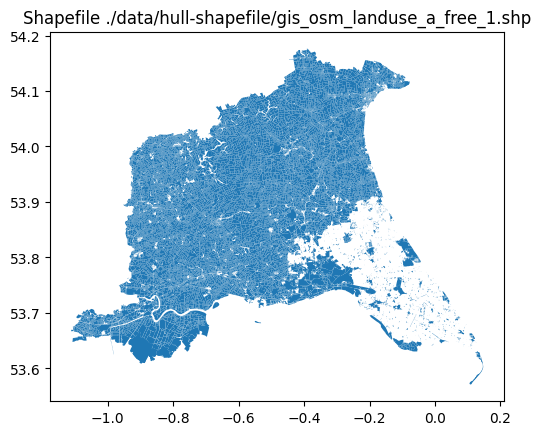

    osm_id  code             fclass                          name  \
0  3282540  7214             quarry                          None   
1  3282573  7201             forest                     Crow Wood   
2  3419230  7207         allotments                          None   
3  3419231  7211  recreation_ground  Bishop Wilton Playing Fields   
4  6180385  7214             quarry          Melton Bottom Quarry   

                                            geometry  
0  POLYGON ((-0.77468 53.99335, -0.77467 53.99351...  
1  POLYGON ((-0.77125 53.99053, -0.77105 53.99108...  
2  POLYGON ((-0.78208 53.98938, -0.78169 53.98946...  
3  POLYGON ((-0.78458 53.98950, -0.78249 53.98983...  
4  POLYGON ((-0.53843 53.74003, -0.53757 53.74126...   ['quarry' 'forest' 'allotments' 'recreation_ground' 'industrial' 'heath'
 'residential' 'nature_reserve' 'retail' 'military' 'commercial'
 'cemetery' 'park' 'grass' 'scrub' 'farmland' 'meadow' 'farmyard'
 'orchard' 'vineyard']


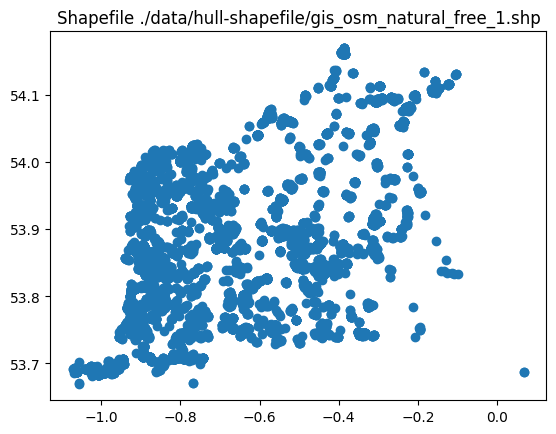

      osm_id  code  fclass                name                   geometry
0   16143433  4101  spring                None  POINT (-0.76975 53.98775)
1  592449158  4121    tree                None  POINT (-0.44788 53.84468)
2  606988987  4101  spring                Well  POINT (-0.81124 53.79331)
3  612542656  4101  spring                Well  POINT (-0.79975 53.70734)
4  697057018  4101  spring  Willow Row Springs  POINT (-0.44369 53.84293) ['spring' 'tree' 'peak' 'cave_entrance']


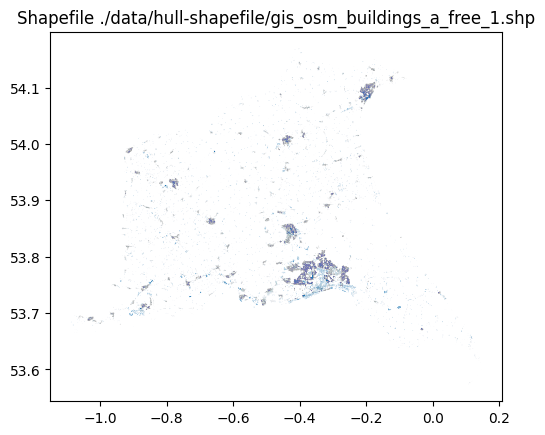

     osm_id  code    fclass         name         type  \
0   5935388  1500  building         Asda        store   
1   8761733  1500  building  Sainsbury's  supermarket   
2  14368870  1500  building          B&Q         None   
3  14368871  1500  building         None        block   
4  14368872  1500  building        Makro         None   

                                            geometry  
0  POLYGON ((-0.37397 53.73364, -0.37379 53.73365...  
1  POLYGON ((-0.42159 53.72325, -0.42004 53.72366...  
2  POLYGON ((-0.38144 53.72608, -0.38115 53.72615...  
3  POLYGON ((-0.37882 53.72691, -0.37770 53.72717...  
4  POLYGON ((-0.38465 53.72560, -0.38345 53.72586...   ['building']


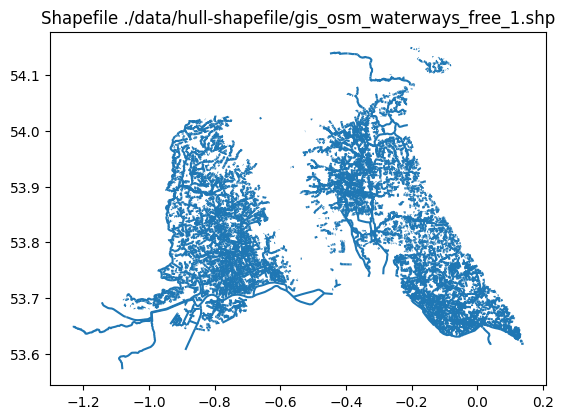

    osm_id  code fclass  width                  name  \
0  3698144  8101  river      0             River Don   
1  4263975  8101  river      0            River Hull   
2  4264143  8101  river      0            River Hull   
3  4264176  8103  canal      0  Driffield Navigation   
4  8002749  8103  canal      0     Pocklington Canal   

                                            geometry  
0  LINESTRING (-1.08110 53.57213, -1.08279 53.583...  
1  LINESTRING (-0.35940 53.79338, -0.35973 53.793...  
2  LINESTRING (-0.43751 53.99481, -0.43704 53.995...  
3  LINESTRING (-0.43272 54.00152, -0.43199 54.000...  
4  LINESTRING (-0.78361 53.91592, -0.78456 53.915...   ['river' 'canal' 'drain' 'stream']


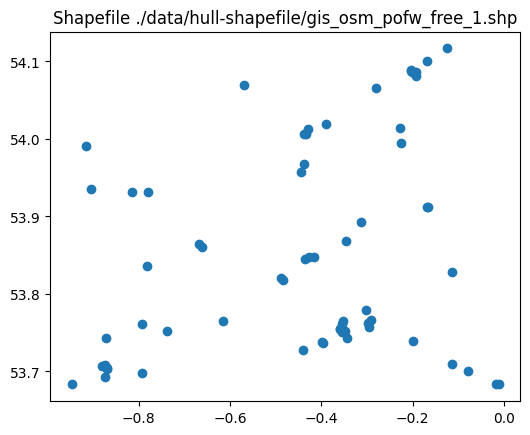

      osm_id  code               fclass  \
0  133429285  3102   christian_catholic   
1  175921051  3100            christian   
2  175921100  3100            christian   
3  206180688  3100            christian   
4  232344758  3105  christian_methodist   

                                              name                   geometry  
0    Our Lady and St Peter's Roman Catholic Church  POINT (-0.19285 54.08635)  
1                                   Baptist Church  POINT (-0.20352 54.08795)  
2  The Church of Jesus Christ of Latter-day Saints  POINT (-0.20194 54.08665)  
3                         Free Presbyterian Church  POINT (-0.20394 54.08945)  
4                  Princes Avenue Methodist Church  POINT (-0.35942 53.75522)   ['christian_catholic' 'christian' 'christian_methodist'
 'christian_evangelical']


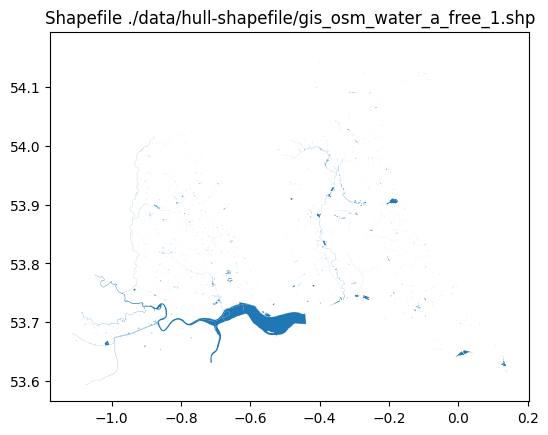

    osm_id  code     fclass           name  \
0  2972032  8202  riverbank           None   
1  2420049  8202  riverbank           None   
2  4263964  8201  reservoir    D Reservoir   
3  4263965  8201  reservoir    O Reservoir   
4  5226704  8200      water  Swanland Pond   

                                            geometry  
0  POLYGON ((-0.86779 53.69745, -0.86772 53.69757...  
1  POLYGON ((-0.33195 53.73903, -0.33182 53.73929...  
2  POLYGON ((-0.36902 53.92342, -0.36532 53.92701...  
3  POLYGON ((-0.37528 53.91659, -0.37518 53.91693...  
4  POLYGON ((-0.49136 53.73865, -0.49126 53.73873...   ['riverbank' 'reservoir' 'water' 'dock' 'wetland']


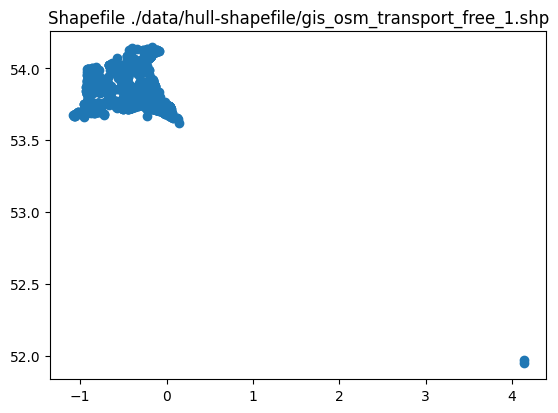

      osm_id  code           fclass                 name  \
0   44524020  5661   ferry_terminal            Rotterdam   
1   60219195  5621         bus_stop   Beverley Hull Road   
2   99388522  5622      bus_station  Paragon Interchange   
3  157599125  5601  railway_station            Rawcliffe   
4  457023748  5651          airport          Mount Airey   

                    geometry  
0   POINT (4.13156 51.94496)  
1  POINT (-0.40610 53.83560)  
2  POINT (-0.34706 53.74446)  
3  POINT (-0.96127 53.68894)  
4  POINT (-0.57594 53.77232)   ['ferry_terminal' 'bus_stop' 'bus_station' 'railway_station' 'airport'
 'taxi' 'helipad']


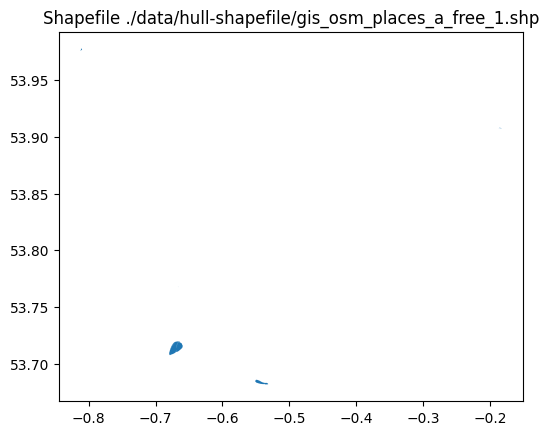

      osm_id  code  fclass  population            name  \
0  130435031  1020  island           0     Swan Island   
1  255075921  1020  island           0  Whitton Island   
2  306265512  1030    farm           0  High Belthorpe   
3  320722951  1030    farm           0            None   
4  360036778  1020  island           0   Read's Island   

                                            geometry  
0  POLYGON ((-0.18661 53.90782, -0.18646 53.90786...  
1  POLYGON ((-0.67963 53.70872, -0.67961 53.70878...  
2  POLYGON ((-0.81259 53.97666, -0.81204 53.97678...  
3  POLYGON ((-0.66646 53.76765, -0.66633 53.76768...  
4  POLYGON ((-0.55107 53.68431, -0.55103 53.68439...   ['island' 'farm']


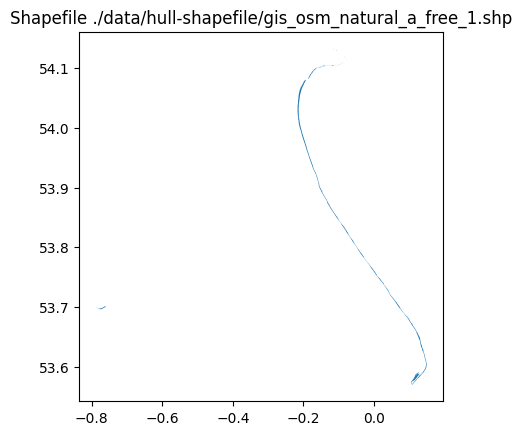

      osm_id  code fclass           name  \
0   38237306  4141  beach    North Sands   
1   38237319  4141  beach           None   
2   40783939  4141  beach  Thornwick Bay   
3  107236225  4141  beach           None   
4    1632579  4141  beach           None   

                                            geometry  
0  POLYGON ((-0.18717 54.08140, -0.18713 54.08153...  
1  POLYGON ((-0.15749 53.90750, -0.15599 53.90772...  
2  POLYGON ((-0.11409 54.13129, -0.11374 54.13130...  
3  POLYGON ((-0.14975 53.89417, -0.14685 53.89458...  
4  POLYGON ((-0.78922 53.70136, -0.78920 53.70142...   ['beach' 'cliff' 'tree']


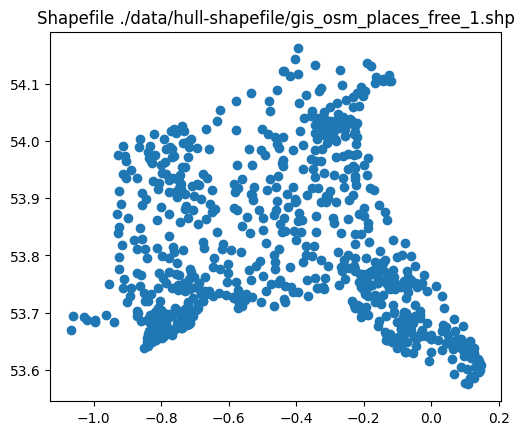

     osm_id  code   fclass  population             name  \
0  12732392  1003  village           0  Stamford Bridge   
1  16143657  1003  village         500    Bishop Wilton   
2  20628349  1002     town           0          Hornsea   
3  20628524  1002     town           0      Bridlington   
4  21448978  1002     town           0  Market Weighton   

                    geometry  
0  POINT (-0.91312 53.99070)  
1  POINT (-0.78519 53.98646)  
2  POINT (-0.16894 53.91346)  
3  POINT (-0.19645 54.08714)  
4  POINT (-0.66797 53.86436)   ['village' 'town' 'hamlet' 'city' 'locality' 'suburb' 'county' 'farm']


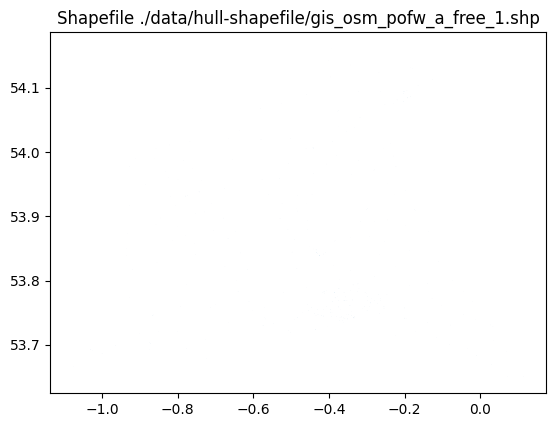

     osm_id  code               fclass              name  \
0  15425987  3101   christian_anglican      Hull Minster   
1  40650689  3101   christian_anglican  Beverley Minster   
2  54850408  3101   christian_anglican        All Saints   
3  55358509  3101   christian_anglican       St Barnabas   
4  55358511  3105  christian_methodist     Christ Church   

                                            geometry  
0  POLYGON ((-0.33497 53.74168, -0.33496 53.74171...  
1  POLYGON ((-0.42551 53.83916, -0.42548 53.83917...  
2  POLYGON ((-0.50310 53.71918, -0.50301 53.71918...  
3  POLYGON ((-0.48390 53.74182, -0.48379 53.74184...  
4  POLYGON ((-0.49055 53.73910, -0.49044 53.73914...   ['christian_anglican' 'christian_methodist' 'christian'
 'christian_catholic' 'jewish' 'sikh' 'buddhist' 'christian_evangelical'
 'christian_protestant']


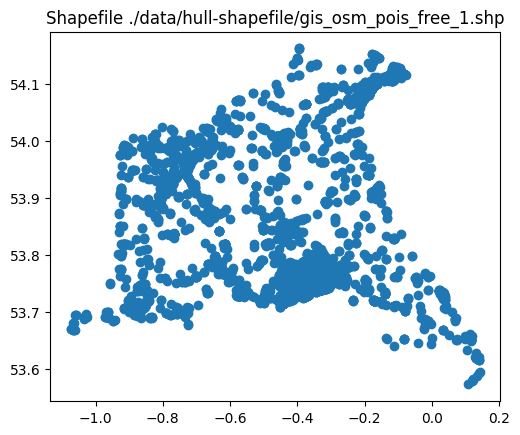

     osm_id  code       fclass                          name  \
0  14071521  2304          pub                    Fleece Inn   
1  14653528  2511  convenience  Bishop Wilton Community Shop   
2  14653529  2004     post_box                          None   
3  14957352  2902        bench                          None   
4  25990971  2304          pub                    Wellington   

                    geometry  
0  POINT (-0.78562 53.98536)  
1  POINT (-0.78486 53.98551)  
2  POINT (-0.78498 53.98560)  
3  POINT (-0.76792 53.98828)  
4  POINT (-0.52390 53.92000)   ['pub' 'convenience' 'post_box' 'bench' 'toilet' 'sports_centre'
 'community_centre' 'library' 'telephone' 'hotel' 'tourist_info'
 'monument' 'attraction' 'cafe' 'atm' 'garden_centre' 'hospital' 'motel'
 'memorial' 'restaurant' 'post_office' 'water_tower' 'doctors'
 'car_dealership' 'police' 'pharmacy' 'recycling' 'fountain' 'veterinary'
 'playground' 'swimming_pool' 'school' 'dentist' 'lighthouse' 'beverages'
 'fast_food' 'b

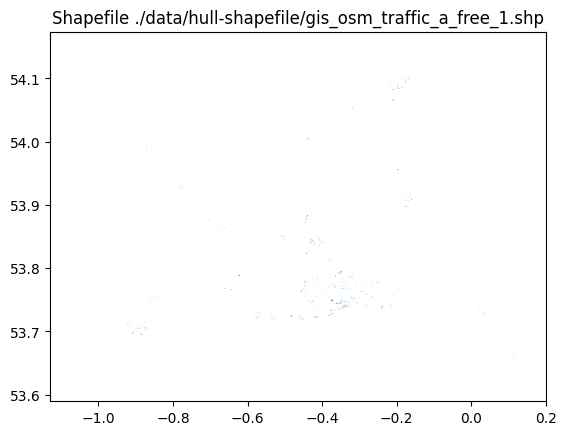

    osm_id  code   fclass  name  \
0  5629214  5260  parking  None   
1  5839253  5260  parking  None   
2  5935386  5260  parking  None   
3  7836767  5260  parking  None   
4  8029771  5260  parking  None   

                                            geometry  
0  POLYGON ((-0.43440 53.72391, -0.43439 53.72411...  
1  POLYGON ((-0.50750 53.71343, -0.50748 53.71360...  
2  POLYGON ((-0.37545 53.73332, -0.37465 53.73339...  
3  POLYGON ((-0.53904 53.72751, -0.53892 53.72777...  
4  POLYGON ((-0.36956 53.73386, -0.36954 53.73390...   ['parking' 'marina' 'parking_multistorey' 'pier' 'parking_bicycle' 'fuel'
 'parking_underground' 'slipway' 'service' 'lock_gate']


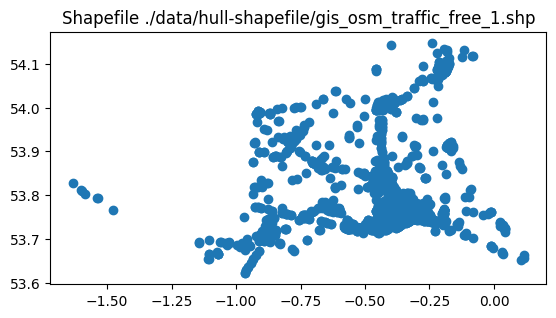

   osm_id  code             fclass                    name  \
0  320011  5206  motorway_junction     Langham Interchange   
1  320031  5206  motorway_junction     Langham Interchange   
2  320188  5206  motorway_junction     Langham Interchange   
3  324271  5206  motorway_junction                    None   
4  324396  5206  motorway_junction  North Cave Interchange   

                    geometry  
0  POINT (-0.96492 53.67502)  
1  POINT (-0.98450 53.68114)  
2  POINT (-0.95888 53.68819)  
3  POINT (-0.86958 53.73223)  
4  POINT (-0.68297 53.77119)   ['motorway_junction' 'crossing' 'mini_roundabout' 'traffic_signals'
 'lock_gate' 'turning_circle' 'weir' 'fuel' 'parking' 'stop'
 'parking_bicycle' 'marina' 'slipway' 'speed_camera' 'street_lamp'
 'waterfall']


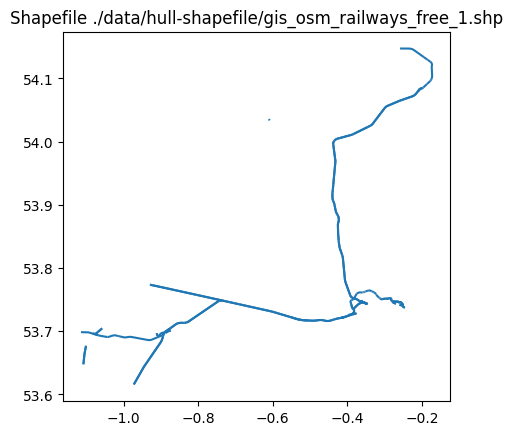

    osm_id  code fclass                             name  layer bridge tunnel  \
0  4078971  6101   rail           Sheffield to Hull Line      0      F      F   
1  4078972  6101   rail           Sheffield to Hull Line      1      T      F   
2  4078973  6101   rail           Sheffield to Hull Line      0      F      F   
3  5839585  6101   rail                        Hull Line      1      T      F   
4  6237384  6101   rail  Hessle Road Junction to Saltend      0      F      F   

                                            geometry  
0  LINESTRING (-0.86124 53.71046, -0.86427 53.709...  
1  LINESTRING (-0.84431 53.71323, -0.83973 53.71319)  
2  LINESTRING (-0.83973 53.71319, -0.83826 53.713...  
3  LINESTRING (-0.50323 53.71691, -0.50303 53.71690)  
4  LINESTRING (-0.38193 53.73313, -0.38209 53.733...   ['rail']


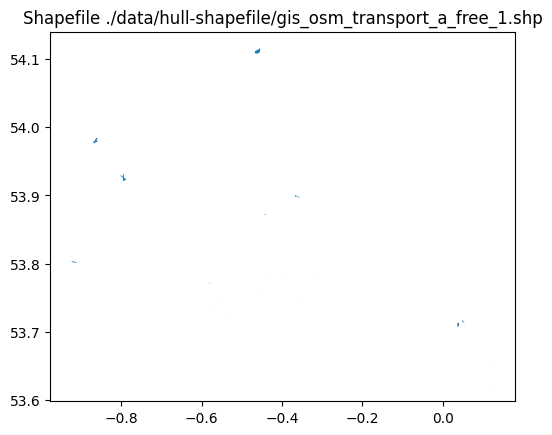

      osm_id  code   fclass                    name  \
0   90850505  5651  airport  Linley Hill (Beverley)   
1   97588430  5655  helipad                    None   
2  148595201  5641     taxi             Sutton Cars   
3  151196619  5655  helipad                    None   
4  152080162  5656    apron             Mount Airey   

                                            geometry  
0  POLYGON ((-0.36791 53.89858, -0.36709 53.90052...  
1  POLYGON ((-0.44378 53.78001, -0.44375 53.78009...  
2  POLYGON ((-0.32229 53.78774, -0.32219 53.78777...  
3  POLYGON ((0.11959 53.65561, 0.11962 53.65594, ...  
4  POLYGON ((-0.58098 53.77161, -0.57814 53.77239...   ['airport' 'helipad' 'taxi' 'apron' 'bus_station' 'bus_stop']


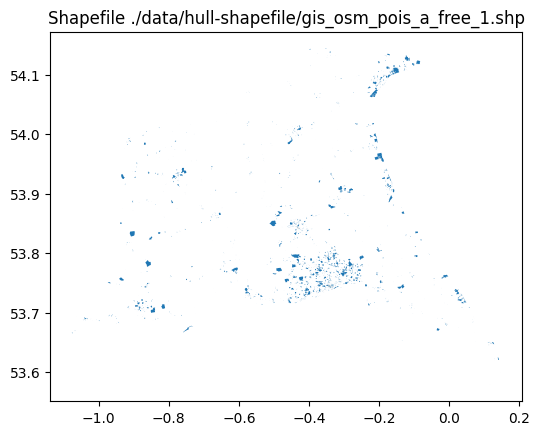

    osm_id  code            fclass                           name  \
0  4214242  2733    archaeological  Archbishop's Palace (site of)   
1  4389769  2961  wastewater_plant              Bishop Wilton/STW   
2  5935388  2501       supermarket                           Asda   
3  7849820  2255       golf_course         Springhead Golf Course   
4  7850857  2255       golf_course                 Hull Golf Club   

                                            geometry  
0  POLYGON ((-0.78228 53.98828, -0.78208 53.98839...  
1  POLYGON ((-0.79347 53.97946, -0.79292 53.98013...  
2  POLYGON ((-0.37397 53.73364, -0.37379 53.73365...  
3  POLYGON ((-0.42917 53.75845, -0.42774 53.75864...  
4  POLYGON ((-0.46986 53.75491, -0.46957 53.75494...   ['archaeological' 'wastewater_plant' 'supermarket' 'golf_course' 'school'
 'doityourself' 'ice_rink' 'cinema' 'restaurant' 'pharmacy' 'pitch'
 'sports_centre' 'playground' 'graveyard' 'park' 'stadium' 'university'
 'department_store' 'clothes' 'college' '

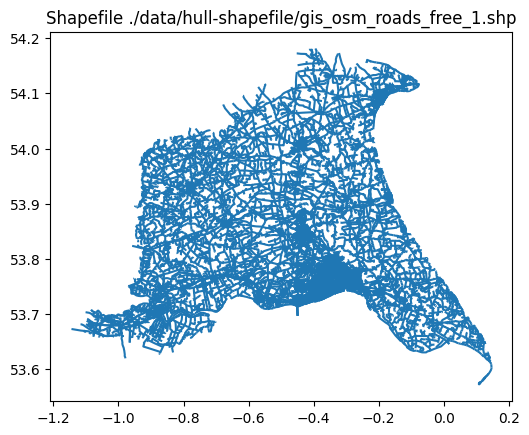

    osm_id  code        fclass           name   ref oneway  maxspeed  layer  \
0  2704450  5111      motorway           None   M18      F       112      0   
1  2950894  5145  track_grade3  Vicarage Lane  None      B         0      0   
2  2951035  5121  unclassified    Thorny Lane  None      B        96      0   
3  2951067  5121  unclassified       Braygate  None      B        96      0   
4  2951074  5122   residential    Main Street  None      B        48      0   

  bridge tunnel                                           geometry  
0      F      F  LINESTRING (-0.96551 53.64834, -0.96545 53.649...  
1      F      F  LINESTRING (-0.78627 53.98717, -0.78687 53.986...  
2      F      F  LINESTRING (-0.79691 53.98761, -0.79596 53.986...  
3      F      F  LINESTRING (-0.79691 53.98761, -0.79506 53.987...  
4      F      F  LINESTRING (-0.78547 53.98540, -0.78477 53.985...   ['motorway' 'track_grade3' 'unclassified' 'residential' 'track' 'path'
 'footway' 'tertiary' 'trunk' 'steps' 's

In [54]:
###  testing code !!!!!!!!!
folder_path = './data/hull-shapefile'

# Find all shapefiles in the folder
shapefiles = glob.glob(os.path.join(folder_path, '*.shp'))
for shp in shapefiles:
    gdf = gpd.read_file(shp)
    gdf.plot()
    plt.title(f'Shapefile {shp}')
    plt.show()
    print(gdf.head(), gdf.fclass.unique())

### <span style="color:Red">  Here, you only need the infos from 1. land use (for one Grid, you need calculate each land type area in one grid), 2. building (change this to points and calculate the numbers od each building type for each grid)  3. transport, the same process as poi 4. POI   </span>

### 2.2.0 land use information in size

#### 2.2.0.1 Write a function for polygon data to detect the size of each land type area

In [92]:
# writing a function for an area information for Polygon data like land use
def areaInfo(data):
    
    gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")
    
    # Convert to a suitable UTM coordinate system for accurate area calculations
    gdf = gdf.to_crs("EPSG:27700")  # Use appropriate UTM zone
    
    # Define grid boundaries
    minx, miny, maxx, maxy = gdf.total_bounds
    grid_size = 1000  # Grid size in meters (1km by 1km)
    
    # Create grid cells
    x_coords = np.arange(minx, maxx + grid_size, grid_size)
    y_coords = np.arange(miny, maxy + grid_size, grid_size)
    
    grid_cells = []
    for x in x_coords:
        for y in y_coords:
            grid_cells.append(Polygon([(x, y), (x + grid_size, y), (x + grid_size, y + grid_size), (x, y + grid_size)]))
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

    # Intersect polygons with grid cells
    intersections = gpd.overlay(gdf, grid, how='intersection')
    
    # Calculate areas of intersections
    intersections['area'] = intersections['geometry'].area
    
    # Summarize areas by land use type within each grid cell
    area_summary = intersections.groupby(['geometry', 'fclass'])['area'].sum().reset_index()
    
    # Display the result
    return area_summary
        

In [94]:
#run the function with the land use geospatial data
areaInfo(osm_data_land_use)

,geometry,fclass,area
0,"POLYGON ((467313.296 415275.506, 467320.951 41...",meadow,18257.607711
1,"POLYGON ((467209.825 416260.811, 467239.494 41...",meadow,32401.114613
2,"POLYGON ((466908.461 417298.295, 466920.528 41...",meadow,33592.625902
3,"POLYGON ((467737.399 417349.799, 467749.895 41...",farmland,223.735817
4,"POLYGON ((468452.045 417141.400, 467998.656 41...",farmland,125526.305789
...,...,...,...
58575,"POLYGON ((539584.860 410729.718, 539729.777 41...",nature_reserve,81569.377612
58576,"POLYGON ((539596.267 410648.984, 539609.326 41...",scrub,47180.750360
58577,"POLYGON ((539757.873 410851.773, 539789.394 41...",scrub,73688.823121
58578,"POLYGON ((539801.229 410937.347, 539862.905 41...",nature_reserve,279976.798363


### 2.2.1 Buildings information size

#### 2.2.1.1 Write a function for point data to detect the size of each Buildings type

In [111]:

def areaInfoPointData(data , data_type):

    gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

    # Convert to a suitable CRS for the UK (EPSG:27700)
    gdf = gdf.to_crs(epsg=27700)
    
    # Define grid boundaries
    minx, miny, maxx, maxy = gdf.total_bounds
    grid_size = 1000  # Grid size in meters (1km by 1km)
    
    # Create grid cells
    x_coords = np.arange(minx, maxx + grid_size, grid_size)
    y_coords = np.arange(miny, maxy + grid_size, grid_size)
    
    grid_cells = []
    for x in x_coords:
        for y in y_coords:
            grid_cells.append(Polygon([(x, y), (x + grid_size, y), (x + grid_size, y + grid_size), (x, y + grid_size)]))
    
    grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)
    
    # Perform spatial join to count points within each grid cell
    point_in_grid = gpd.sjoin(gdf, grid, how='left', op='within')
    
    # Count the number of points in each grid cell
    point_count = point_in_grid.groupby('index_right').size().reset_index(name=data_type)
    
    # Merge the counts back to the grid
    grid[data_type] = point_count[data_type].astype("int")
    
    # Replace NaN with 0 for grid cells without points
    grid[data_type] = grid[data_type].fillna(0)
    
    # Display the result
    print(grid[['geometry', data_type]])
    
    #visualization
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    grid.plot(column=data_type, ax=ax, legend=True, cmap='OrRd')
    gdf.plot(ax=ax, color='blue', markersize=5)
    plt.title('Building Count in 1km x 1km Grid')
    plt.show()

    

                                               geometry  building_count
0     POLYGON ((460320.911 410585.484, 461320.911 41...             1.0
1     POLYGON ((460320.911 411585.484, 461320.911 41...             1.0
2     POLYGON ((460320.911 412585.484, 461320.911 41...             2.0
3     POLYGON ((460320.911 413585.484, 461320.911 41...             3.0
4     POLYGON ((460320.911 414585.484, 461320.911 41...             4.0
...                                                 ...             ...
5556  POLYGON ((542320.911 472585.484, 543320.911 47...             0.0
5557  POLYGON ((542320.911 473585.484, 543320.911 47...             0.0
5558  POLYGON ((542320.911 474585.484, 543320.911 47...             0.0
5559  POLYGON ((542320.911 475585.484, 543320.911 47...             0.0
5560  POLYGON ((542320.911 476585.484, 543320.911 47...             0.0

[5561 rows x 2 columns]


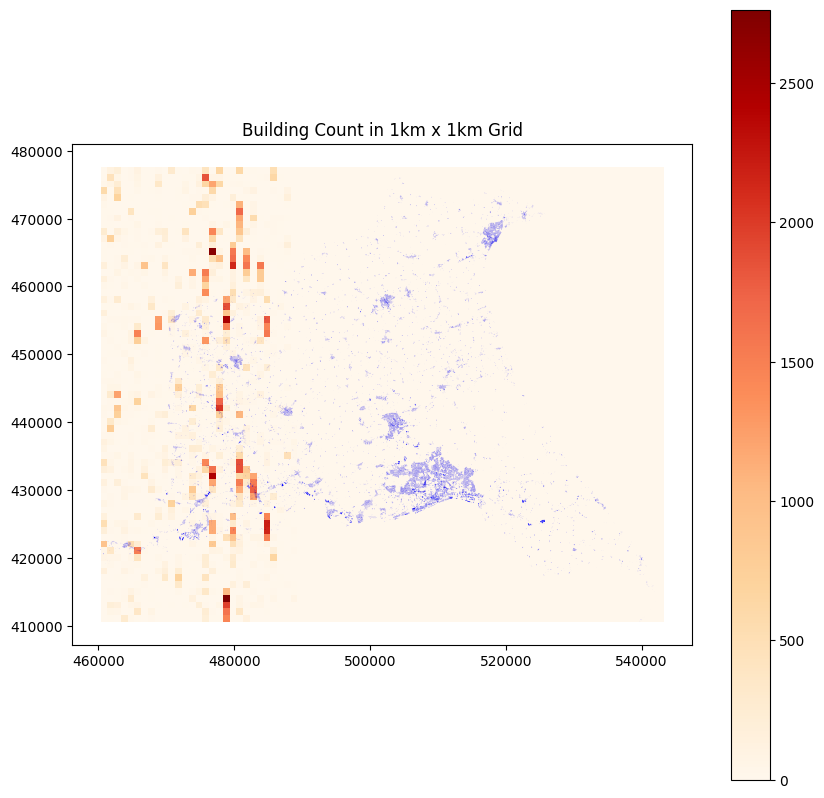

In [112]:
#run the function to get the building counts
areaInfoPointData(osm_data_buildings  , 'building_count')

### 2.2.2 Transport information size

#### 2.2.2.1 run a function for point data to detect the size of each transport type

                                                geometry  transport_count
0      POLYGON ((460526.226 245209.549, 461526.226 24...              1.0
1      POLYGON ((460526.226 246209.549, 461526.226 24...              5.0
2      POLYGON ((460526.226 247209.549, 461526.226 24...              2.0
3      POLYGON ((460526.226 248209.549, 461526.226 24...              7.0
4      POLYGON ((460526.226 249209.549, 461526.226 24...              2.0
...                                                  ...              ...
83255  POLYGON ((821526.226 470209.549, 822526.226 47...              0.0
83256  POLYGON ((821526.226 471209.549, 822526.226 47...              0.0
83257  POLYGON ((821526.226 472209.549, 822526.226 47...              0.0
83258  POLYGON ((821526.226 473209.549, 822526.226 47...              0.0
83259  POLYGON ((821526.226 474209.549, 822526.226 47...              0.0

[83260 rows x 2 columns]


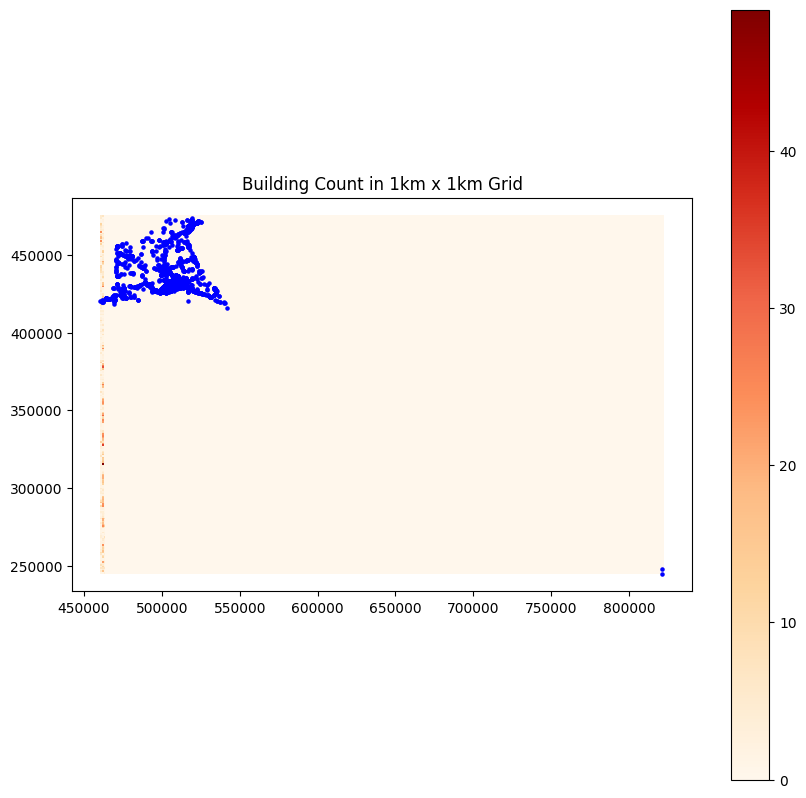

In [114]:
areaInfoPointData(osm_data_point_transport , 'transport_count')

### 2.2.3 Point of Interest information 

#### 2.2.3.1 run a function for point data to detect the size of each POI type

                                               geometry  poi_count
0     POLYGON ((461334.221 410536.335, 462334.221 41...        2.0
1     POLYGON ((461334.221 411536.335, 462334.221 41...        3.0
2     POLYGON ((461334.221 412536.335, 462334.221 41...        2.0
3     POLYGON ((461334.221 413536.335, 462334.221 41...        3.0
4     POLYGON ((461334.221 414536.335, 462334.221 41...       19.0
...                                                 ...        ...
5407  POLYGON ((542334.221 471536.335, 543334.221 47...        0.0
5408  POLYGON ((542334.221 472536.335, 543334.221 47...        0.0
5409  POLYGON ((542334.221 473536.335, 543334.221 47...        0.0
5410  POLYGON ((542334.221 474536.335, 543334.221 47...        0.0
5411  POLYGON ((542334.221 475536.335, 543334.221 47...        0.0

[5412 rows x 2 columns]


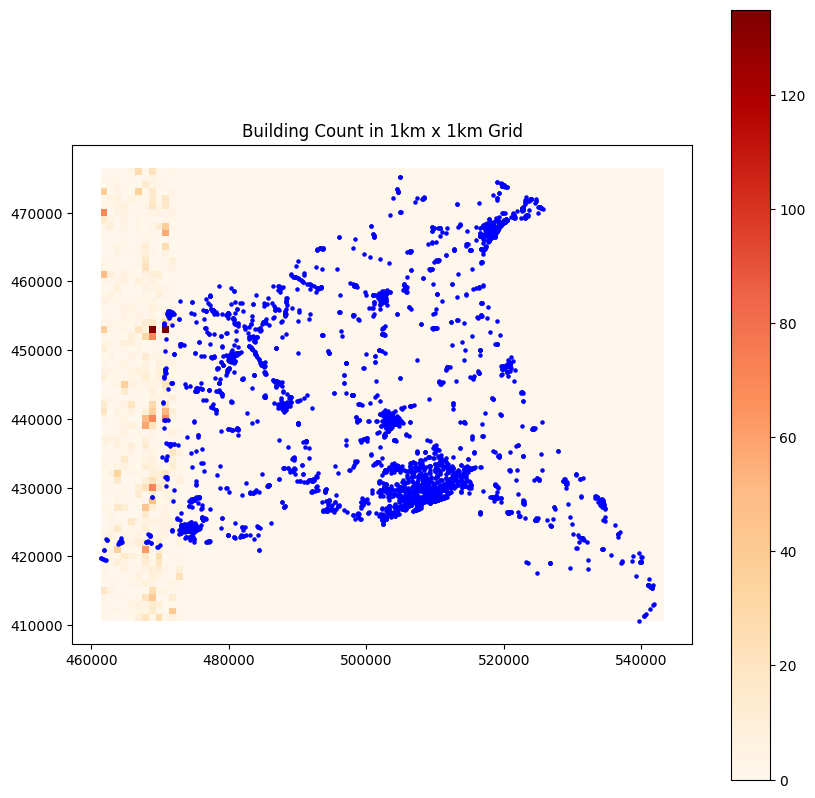

In [115]:
areaInfoPointData(osm_data_point_poi , 'poi_count')

### Merging all the shapefiles together

In [56]:
osm_df = gpd.read_file('./data/hull-shapefile')
osm_df

,osm_id,code,fclass,name,geometry
0,3282540,7214,quarry,None,"POLYGON ((-0.77468 53.99335, -0.77467 53.99351..."
1,3282573,7201,forest,Crow Wood,"POLYGON ((-0.77125 53.99053, -0.77105 53.99108..."
2,3419230,7207,allotments,None,"POLYGON ((-0.78208 53.98938, -0.78169 53.98946..."
3,3419231,7211,recreation_ground,Bishop Wilton Playing Fields,"POLYGON ((-0.78458 53.98950, -0.78249 53.98983..."
4,6180385,7214,quarry,Melton Bottom Quarry,"POLYGON ((-0.53843 53.74003, -0.53757 53.74126..."
...,...,...,...,...,...
37926,1289640324,7218,grass,None,"POLYGON ((-0.19507 53.76706, -0.19505 53.76707..."
37927,1289640325,7218,grass,None,"POLYGON ((-0.19468 53.76689, -0.19462 53.76690..."
37928,1289640326,7218,grass,None,"POLYGON ((-0.19524 53.76715, -0.19518 53.76719..."
37929,1289640327,7218,grass,None,"POLYGON ((-0.19495 53.76716, -0.19476 53.76706..."


### <span style="color:Red">  When building polygon, poi polygon, you can use pts to represent, but you cannnot do this for land use </span>

### Boundary Data

### Checking the boundary shapefile on how it looks

In [59]:
osm_boundary_1km = gpd.read_file('./data/Great_Britain_GRID_shapefile')
osm_boundary_1km

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE2780N3001,2780000,3001000,"POLYGON ((2780000.000 3001000.000, 2780000.000..."
1,1kmE2780N3002,2780000,3002000,"POLYGON ((2780000.000 3002000.000, 2780000.000..."
2,1kmE2780N3003,2780000,3003000,"POLYGON ((2780000.000 3003000.000, 2780000.000..."
3,1kmE2780N3004,2780000,3004000,"POLYGON ((2780000.000 3004000.000, 2780000.000..."
4,1kmE2780N3005,2780000,3005000,"POLYGON ((2780000.000 3005000.000, 2780000.000..."
...,...,...,...,...
1091779,1kmE3922N3657,3922000,3657000,"POLYGON ((3922000.000 3657000.000, 3922000.000..."
1091780,1kmE3922N3658,3922000,3658000,"POLYGON ((3922000.000 3658000.000, 3922000.000..."
1091781,1kmE3922N3659,3922000,3659000,"POLYGON ((3922000.000 3659000.000, 3922000.000..."
1091782,1kmE3922N3660,3922000,3660000,"POLYGON ((3922000.000 3660000.000, 3922000.000..."


<Axes: >

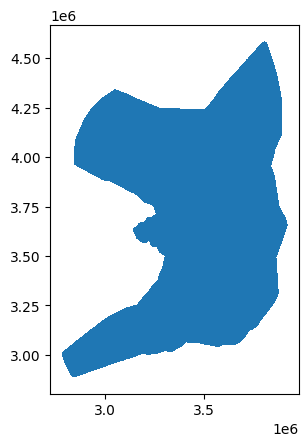

In [60]:
# Viewing the boundary data
osm_boundary_1km.plot()

### LSOA BOUNDARY DATA

In [61]:
lsoa_geo = gpd.read_file("./data/LSOA_BoundaryData")
lsoa_geo

,lsoa21cd,lsoa21nm,label,name,geometry
0,E01011905,Wakefield 028C,E92000001E12000003E08000036E02002465E01011905,Wakefield 028C,"POLYGON ((431757.944 419643.827, 431759.407 41..."
1,E01011876,Wakefield 007B,E92000001E12000003E08000036E02002444E01011876,Wakefield 007B,"POLYGON ((435467.062 424661.606, 435468.954 42..."
2,E01034963,Harrogate 008E,E92000001E12000003E07000165E02005768E01034963,Harrogate 008E,"POLYGON ((425907.594 459285.594, 425930.813 45..."
3,E01011803,Wakefield 011A,E92000001E12000003E08000036E02002448E01011803,Wakefield 011A,"POLYGON ((448734.559 423385.667, 448737.655 42..."
4,E01011297,Leeds 030B,E92000001E12000003E08000035E02002359E01011297,Leeds 030B,"POLYGON ((442339.406 438083.312, 442357.404 43..."
...,...,...,...,...,...
3350,E01010627,Bradford 038E,E92000001E12000003E08000032E02002220E01010627,Bradford 038E,"POLYGON ((419277.982 434280.077, 419289.724 43..."
3351,E01011669,Leeds 110F,E92000001E12000003E08000035E02006861E01011669,Leeds 110F,"POLYGON ((429378.157 436146.589, 429381.406 43..."
3352,E01010982,Calderdale 013A,E92000001E12000003E08000033E02002256E01010982,Calderdale 013A,"POLYGON ((393755.380 425088.107, 393746.166 42..."
3353,E01011810,Wakefield 010D,E92000001E12000003E08000036E02002447E01011810,Wakefield 010D,"POLYGON ((451735.109 423993.287, 451729.219 42..."


In [62]:
#checking the value counts
lsoa_geo['name'].value_counts()


name
Wakefield 028C                   1
Bradford 030E                    1
Leeds 067I                       1
East Riding of Yorkshire 034A    1
Bradford 008D                    1
                                ..
Kingston upon Hull 031E          1
Barnsley 020G                    1
Sheffield 062D                   1
Harrogate 010B                   1
Sheffield 051B                   1
Name: count, Length: 3355, dtype: int64

In [63]:
# Filtering the dataframe to include only rows where 'Leeds' appears in 'LSOA name'
lsoa_hull = lsoa_geo[lsoa_geo['lsoa21nm'].str.contains('Hull')]
lsoa_hull

,lsoa21cd,lsoa21nm,label,name,geometry
109,E01012765,Kingston upon Hull 005B,E92000001E12000003E06000010E02002656E01012765,Kingston upon Hull 005B,"POLYGON ((508697.250 433210.219, 508696.976 43..."
132,E01035463,Kingston upon Hull 011F,E92000001E12000003E06000010E02002662E01035463,Kingston upon Hull 011F,"POLYGON ((512991.624 432451.851, 512989.851 43..."
143,E01012848,Kingston upon Hull 020B,E92000001E12000003E06000010E02002671E01012848,Kingston upon Hull 020B,"POLYGON ((514326.000 429934.000, 514293.000 42..."
204,E01012843,Kingston upon Hull 021B,E92000001E12000003E06000010E02002672E01012843,Kingston upon Hull 021B,"POLYGON ((514997.781 430940.663, 514988.906 43..."
235,E01033104,Kingston upon Hull 029E,E92000001E12000003E06000010E02002680E01033104,Kingston upon Hull 029E,"POLYGON ((509552.000 429169.000, 509558.793 42..."
...,...,...,...,...,...
3300,E01012782,Kingston upon Hull 002A,E92000001E12000003E06000010E02002653E01012782,Kingston upon Hull 002A,"POLYGON ((510338.156 435107.688, 510426.199 43..."
3302,E01012767,Kingston upon Hull 012B,E92000001E12000003E06000010E02002663E01012767,Kingston upon Hull 012B,"POLYGON ((508610.197 432267.530, 508615.000 43..."
3308,E01012807,Kingston upon Hull 016C,E92000001E12000003E06000010E02002667E01012807,Kingston upon Hull 016C,"POLYGON ((511190.094 431056.156, 511193.125 43..."
3330,E01012778,Kingston upon Hull 004A,E92000001E12000003E06000010E02002655E01012778,Kingston upon Hull 004A,"POLYGON ((511544.405 433827.924, 511546.375 43..."


<Axes: >

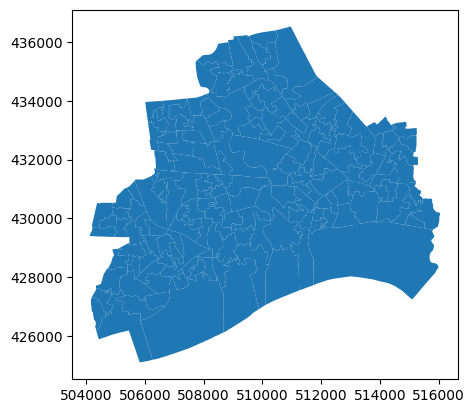

In [64]:
lsoa_hull.plot()

### Filtering The Boundary for Hull City from the Boundary data

In [65]:
# Step 1: Read the Great Britain GRID shapefile and the Hull City boundary shapefile
grids = osm_boundary_1km
hull_boundary = lsoa_hull  # This is your LA boundary

# Step 2: Ensure both GeoDataFrames have the same CRS
hull_boundary = hull_boundary.to_crs(grids.crs)

# Step 3: Perform the spatial join to filter grids that intersect with Hull City's boundary
hull_grid_data = gpd.sjoin(grids, hull_boundary, how="inner", op="intersects")

# Step 4: Drop the extra columns added by the spatial join
hull_grid_data = hull_grid_data.drop(columns=['index_right'])

# Step 5: Save the filtered data to a new shapefile
hull_grid_data.to_file('./data/hull_boundary_data/full_hull_boundary.shp')

In [66]:
#Acquiring the data from the boundary folder
hull_grid_all = gpd.read_file("./data/hull_boundary_data")
hull_grid_all

,CELLCODE,EOFORIGIN,NOFORIGIN,lsoa21cd,lsoa21nm,label,name,geometry
0,1kmE3635N3450,3635000,3450000,E01012882,Kingston upon Hull 033A,E92000001E12000003E06000010E02006813E01012882,Kingston upon Hull 033A,"POLYGON ((3635000.000 3450000.000, 3635000.000..."
1,1kmE3635N3450,3635000,3450000,E01012884,Kingston upon Hull 033C,E92000001E12000003E06000010E02006813E01012884,Kingston upon Hull 033C,"POLYGON ((3635000.000 3450000.000, 3635000.000..."
2,1kmE3635N3451,3635000,3451000,E01012882,Kingston upon Hull 033A,E92000001E12000003E06000010E02006813E01012882,Kingston upon Hull 033A,"POLYGON ((3635000.000 3451000.000, 3635000.000..."
3,1kmE3635N3451,3635000,3451000,E01012884,Kingston upon Hull 033C,E92000001E12000003E06000010E02006813E01012884,Kingston upon Hull 033C,"POLYGON ((3635000.000 3451000.000, 3635000.000..."
4,1kmE3635N3452,3635000,3452000,E01012884,Kingston upon Hull 033C,E92000001E12000003E06000010E02006813E01012884,Kingston upon Hull 033C,"POLYGON ((3635000.000 3452000.000, 3635000.000..."
...,...,...,...,...,...,...,...,...
570,1kmE3647N3455,3647000,3455000,E01012835,Kingston upon Hull 009B,E92000001E12000003E06000010E02002660E01012835,Kingston upon Hull 009B,"POLYGON ((3647000.000 3455000.000, 3647000.000..."
571,1kmE3647N3455,3647000,3455000,E01012840,Kingston upon Hull 009E,E92000001E12000003E06000010E02002660E01012840,Kingston upon Hull 009E,"POLYGON ((3647000.000 3455000.000, 3647000.000..."
572,1kmE3647N3455,3647000,3455000,E01012839,Kingston upon Hull 009D,E92000001E12000003E06000010E02002660E01012839,Kingston upon Hull 009D,"POLYGON ((3647000.000 3455000.000, 3647000.000..."
573,1kmE3647N3456,3647000,3456000,E01012839,Kingston upon Hull 009D,E92000001E12000003E06000010E02002660E01012839,Kingston upon Hull 009D,"POLYGON ((3647000.000 3456000.000, 3647000.000..."


### <span style="color:Red">  Only 108 1km * 1km  grids in hull city, so check the hull_grid_all df, you should delete the duplicates</span>

In [67]:
hull_grid_all.CELLCODE.nunique()

108

In [116]:
hull_grid_all = hull_grid_all.drop_duplicates(subset='CELLCODE')
unique_cells_after = hull_grid_all['CELLCODE'].nunique()
print(f"Number of unique grid cells after removing duplicates: {unique_cells_after}")

Number of unique grid cells after removing duplicates: 108


<Axes: >

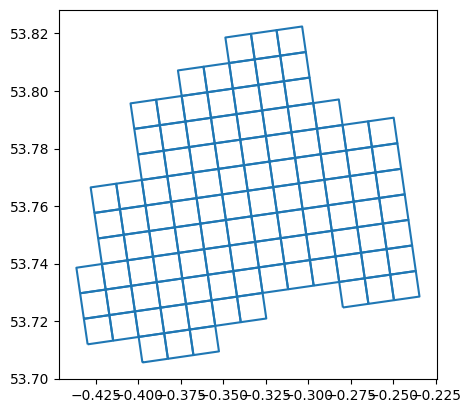

In [117]:
hull_grid_all.boundary.plot( )

### <span style="color:Red"> Here, I  suggest you split one 1 km * 1 km grid to 4 500m*500m grid, the you will get the 108 * 4 = 432 grids, the new grid index can be extended as 1kmE3635N3450_1, 1kmE3635N3450_2, 1kmE3635N3450_3, 1kmE3635N3450_4</span>

### 2.3.0 Write a function to split the 1km by 1km to 500m by 500m and will get 432 grids

In [121]:

def info500m(data , data_type):
    gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")
    
    # Convert to a suitable CRS for the UK (EPSG:27700)
    gdf = gdf.to_crs(epsg=27700)
    
    # Define grid boundaries
    minx, miny, maxx, maxy = gdf.total_bounds
    grid_size = 1000  # Grid size in meters (1km by 1km)
    
    # Create 1km x 1km grid cells
    x_coords = np.arange(minx, maxx + grid_size, grid_size)
    y_coords = np.arange(miny, maxy + grid_size, grid_size)
    grid_cells = []
    for x in x_coords:
        for y in y_coords:
            grid_cells.append(Polygon([(x, y), (x + grid_size, y), (x + grid_size, y + grid_size), (x, y + grid_size)]))
    
    grid_1km = gpd.GeoDataFrame({'geometry': grid_cells}, crs=gdf.crs)

    # Split each 1km x 1km grid cell into four 500m x 500m grid cells
    grid_cells_500m = []
    for cell in grid_1km.geometry:
        minx, miny, maxx, maxy = cell.bounds
        midx = (minx + maxx) / 2
        midy = (miny + maxy) / 2
        grid_cells_500m.extend([
            Polygon([(minx, miny), (midx, miny), (midx, midy), (minx, midy)]),
            Polygon([(midx, miny), (maxx, miny), (maxx, midy), (midx, midy)]),
            Polygon([(minx, midy), (midx, midy), (midx, maxy), (minx, maxy)]),
            Polygon([(midx, midy), (maxx, midy), (maxx, maxy), (midx, maxy)])
        ])
    
    grid_500m = gpd.GeoDataFrame({'geometry': grid_cells_500m}, crs=gdf.crs)

    # Assign new grid indices
    grid_500m['grid_index'] = np.repeat(grid_1km.index, 4)
    grid_500m['grid_index'] = grid_500m.apply(lambda row: f"{row['grid_index'] // 4}kmE{int(row.geometry.centroid.x)}N{int(row.geometry.centroid.y)}_{row.name % 4 + 1}", axis=1)
    
    # Perform spatial join to count points within each 500m grid cell
    point_in_grid = gpd.sjoin(gdf, grid_500m, how='left', op='within')
    
    # Count the number of points in each 500m grid cell
    point_count = point_in_grid.groupby('grid_index').size().reset_index(name=data_type)
    
    # Merge the counts back to the 500m grid
    grid_500m = grid_500m.merge(point_count, how='left', left_on='grid_index', right_on='grid_index')
    grid_500m[data_type] = grid_500m[data_type].fillna(0)
    
    # Display the result
    print(grid_500m[['grid_index']])

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    grid_500m.plot(column=data_type, ax=ax, legend=True, cmap='OrRd')
    gdf.plot(ax=ax, color='blue', markersize=5)
    plt.title(f'{data_type} in 500m x 500m Grid')
    plt.show()

# <span style="color:Red"> Use new grid to spatial the building, land use, pois and snap the info to each grid</span>

### 2.3.1 Run a function to spatial the building , land_use , poi and transport

#### 2.3.1.1 Buildings


                   grid_index
0         0kmE460570N410835_1
1         0kmE461070N410835_2
2         0kmE460570N411335_3
3         0kmE461070N411335_4
4         0kmE460570N411835_1
...                       ...
22239  1389kmE543070N476335_4
22240  1390kmE542570N476835_1
22241  1390kmE543070N476835_2
22242  1390kmE542570N477335_3
22243  1390kmE543070N477335_4

[22244 rows x 1 columns]


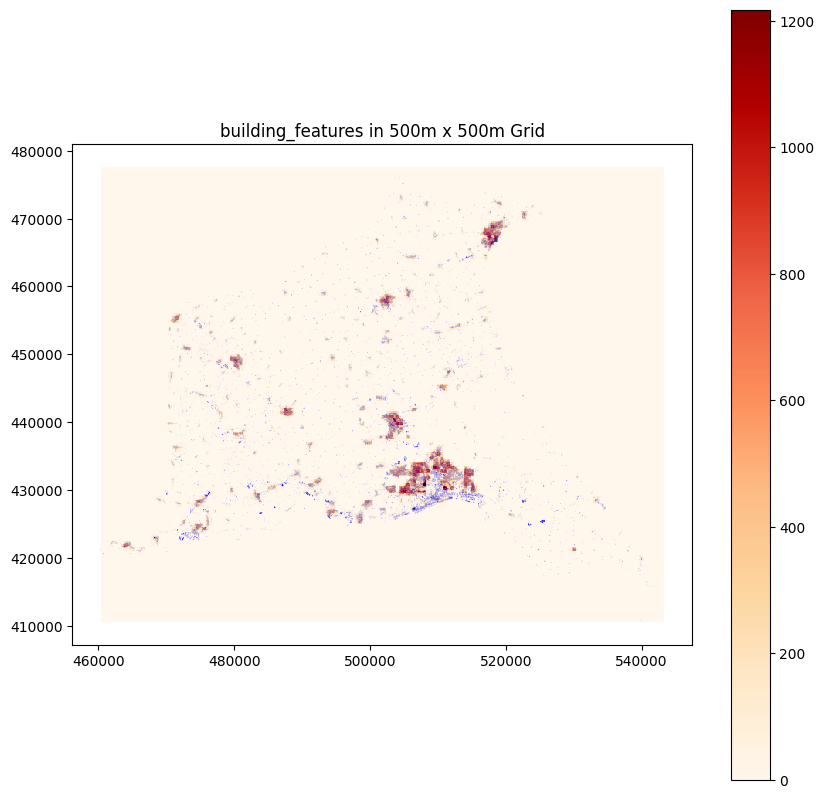

In [125]:
info500m(osm_data_buildings , 'building_features')

#### 2.3.1.2 Land Use

                   grid_index
0         0kmE458999N410599_1
1         0kmE459499N410599_2
2         0kmE458999N411099_3
3         0kmE459499N411099_4
4         0kmE458999N411599_1
...                       ...
23115  1444kmE543499N477099_4
23116  1444kmE542999N477599_1
23117  1444kmE543499N477599_2
23118  1444kmE542999N478099_3
23119  1444kmE543499N478099_4

[23120 rows x 1 columns]


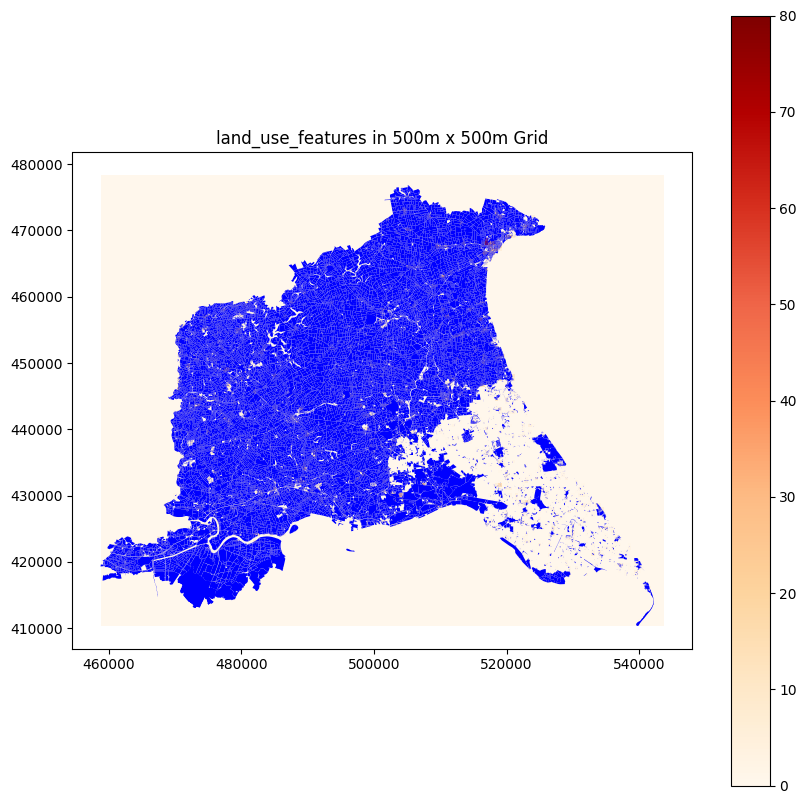

In [126]:
info500m(osm_data_land_use , 'land_use_features')

#### 2.3.1.3 POI

                   grid_index
0         0kmE461584N410786_1
1         0kmE462084N410786_2
2         0kmE461584N411286_3
3         0kmE462084N411286_4
4         0kmE461584N411786_1
...                       ...
21643  1352kmE543084N475286_4
21644  1352kmE542584N475786_1
21645  1352kmE543084N475786_2
21646  1352kmE542584N476286_3
21647  1352kmE543084N476286_4

[21648 rows x 1 columns]


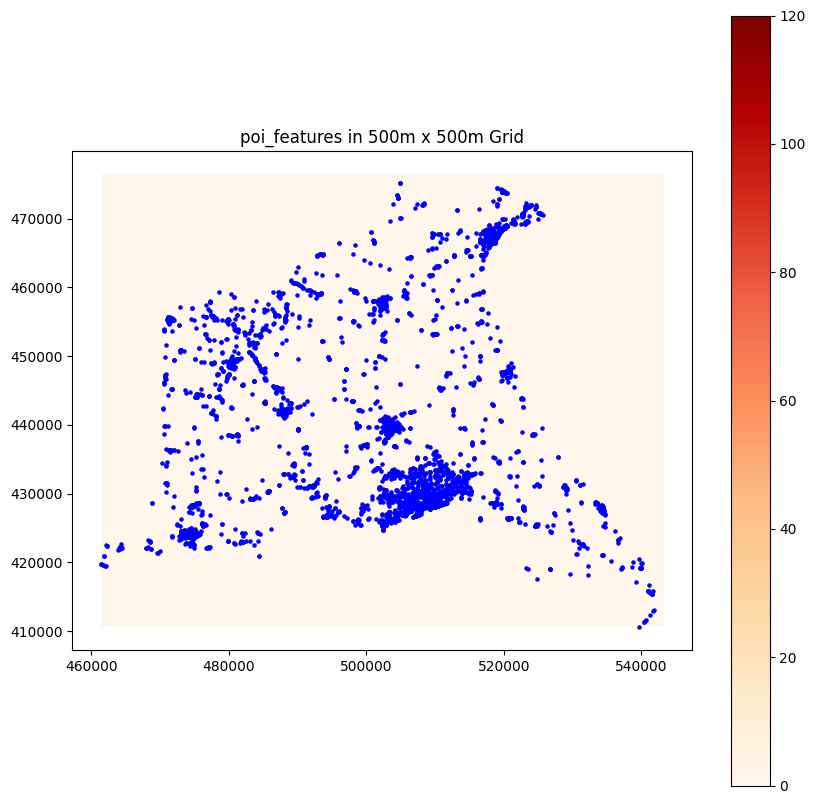

In [127]:
info500m(osm_data_point_poi , 'poi_features')

## Census Data Collection

#### Checking out the data for each of them

In [69]:
# acquiring the census data
census_data = pd.read_csv('./data/census_data.csv')
census_data

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Age (6 categories) Code,Age (6 categories),Economic activity status (7 categories) Code,Economic activity status (7 categories),Sex (2 categories) Code,Sex (2 categories),Observation
0,E01000001,City of London 001A,1,Aged 15 years and under,-8,Does not apply,1,Female,58
1,E01000001,City of London 001A,1,Aged 15 years and under,-8,Does not apply,2,Male,64
2,E01000001,City of London 001A,1,Aged 15 years and under,1,Economically active (excluding full-time stude...,1,Female,0
3,E01000001,City of London 001A,1,Aged 15 years and under,1,Economically active (excluding full-time stude...,2,Male,0
4,E01000001,City of London 001A,1,Aged 15 years and under,2,Economically active (excluding full-time stude...,1,Female,0
...,...,...,...,...,...,...,...,...,...
2996443,W01002040,Vale of Glamorgan 015F,6,Aged 65 years and over,4,Economically active and a full-time student: U...,2,Male,0
2996444,W01002040,Vale of Glamorgan 015F,6,Aged 65 years and over,5,Economically inactive (excluding full-time stu...,1,Female,32
2996445,W01002040,Vale of Glamorgan 015F,6,Aged 65 years and over,5,Economically inactive (excluding full-time stu...,2,Male,30
2996446,W01002040,Vale of Glamorgan 015F,6,Aged 65 years and over,6,Economically inactive and a full-time student,1,Female,0


In [70]:
# acquiring the new census data
new_census_data = pd.read_csv('./data/new_census_data.csv')
new_census_data

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Ethnic group (20 categories) Code,Ethnic group (20 categories),Country of birth (13 categories) Code,Country of birth (13 categories),Observation
0,E01001745,Hackney 016A,-8,Does not apply,-8,Does not apply,0
1,E01001745,Hackney 016A,-8,Does not apply,1,Europe: United Kingdom: England,0
2,E01001745,Hackney 016A,-8,Does not apply,2,Europe: United Kingdom: Northern Ireland,0
3,E01001745,Hackney 016A,-8,Does not apply,3,Europe: United Kingdom: Scotland,0
4,E01001745,Hackney 016A,-8,Does not apply,4,Europe: United Kingdom: Wales,0
...,...,...,...,...,...,...,...
2855,W01001695,Cardiff 036B,19,Other ethnic group: Any other ethnic group,8,Europe: Other Europe,29
2856,W01001695,Cardiff 036B,19,Other ethnic group: Any other ethnic group,9,Africa,15
2857,W01001695,Cardiff 036B,19,Other ethnic group: Any other ethnic group,10,Middle East and Asia,27
2858,W01001695,Cardiff 036B,19,Other ethnic group: Any other ethnic group,11,The Americas and the Caribbean,27


In [71]:
# concatenating the two dataframe
census_df = pd.concat([census_data , new_census_data])
census_df

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Age (6 categories) Code,Age (6 categories),Economic activity status (7 categories) Code,Economic activity status (7 categories),Sex (2 categories) Code,Sex (2 categories),Observation,Ethnic group (20 categories) Code,Ethnic group (20 categories),Country of birth (13 categories) Code,Country of birth (13 categories)
0,E01000001,City of London 001A,1.0,Aged 15 years and under,-8.0,Does not apply,1.0,Female,58,NaN,NaN,NaN,NaN
1,E01000001,City of London 001A,1.0,Aged 15 years and under,-8.0,Does not apply,2.0,Male,64,NaN,NaN,NaN,NaN
2,E01000001,City of London 001A,1.0,Aged 15 years and under,1.0,Economically active (excluding full-time stude...,1.0,Female,0,NaN,NaN,NaN,NaN
3,E01000001,City of London 001A,1.0,Aged 15 years and under,1.0,Economically active (excluding full-time stude...,2.0,Male,0,NaN,NaN,NaN,NaN
4,E01000001,City of London 001A,1.0,Aged 15 years and under,2.0,Economically active (excluding full-time stude...,1.0,Female,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,W01001695,Cardiff 036B,NaN,NaN,NaN,NaN,NaN,NaN,29,19.0,Other ethnic group: Any other ethnic group,8.0,Europe: Other Europe
2856,W01001695,Cardiff 036B,NaN,NaN,NaN,NaN,NaN,NaN,15,19.0,Other ethnic group: Any other ethnic group,9.0,Africa
2857,W01001695,Cardiff 036B,NaN,NaN,NaN,NaN,NaN,NaN,27,19.0,Other ethnic group: Any other ethnic group,10.0,Middle East and Asia
2858,W01001695,Cardiff 036B,NaN,NaN,NaN,NaN,NaN,NaN,27,19.0,Other ethnic group: Any other ethnic group,11.0,The Americas and the Caribbean


### DIGIMAP AERIAL DATA 

In [72]:
digimap_data_new = gpd.read_file('./data/hull-digital-aerial-data')
digimap_data_new

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry
0,East Midlands English Region,ER,English Region,EAST_MIDLANDS_ENGLISH_REGION,2072,2072,124952,41423,E12000004,1581065.036,16738.106,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((413673.997 400018.995, 413676.198 39..."
1,London English Region,ER,English Region,LONDON_ENGLISH_REGION,2073,2073,124433,41428,E12000007,159462.494,2129.716,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((531024.595 200933.623, 531026.320 20..."
2,North West English Region,ER,English Region,NORTH_WEST_ENGLISH_REGION,2074,2074,126756,41431,E12000002,1491493.427,75009.049,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((374209.550 348536.660, 374212.450 34..."
3,West Midlands English Region,ER,English Region,WEST_MIDLANDS_ENGLISH_REGION,2568,2568,125096,41426,E12000005,1300382.887,0.000,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((360408.943 340399.192, 360410.895 34..."
4,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2569,2569,124954,41430,E12000003,1556042.378,15220.120,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((424875.080 379990.440, 424872.170 37..."
5,South East English Region,ER,English Region,SOUTH_EAST_ENGLISH_REGION,2570,2570,70735,41421,E12000008,1940041.184,31274.395,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((490173.603 256107.999, 490234...."
6,North East English Region,ER,English Region,NORTH_EAST_ENGLISH_REGION,2571,2571,127015,41422,E12000001,867553.985,7675.149,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((398217.260 657393.560, 398226...."
7,Eastern English Region,ER,English Region,EASTERN_ENGLISH_REGION,2573,2573,124430,41425,E12000006,1958705.316,45455.208,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((647445.460 323359.390, 647443...."
8,South West English Region,ER,English Region,SOUTH_WEST_ENGLISH_REGION,2574,2574,125094,41427,E12000009,2438569.751,53581.519,SR,None,None,STATISTICAL REPORTING AREA,"MULTIPOLYGON (((418659.802 242642.204, 418662...."


### Checking the region names

In [73]:
digimap_data_new["NAME"].unique()

array(['East Midlands English Region', 'London English Region',
       'North West English Region', 'West Midlands English Region',
       'Yorkshire and the Humber English Region',
       'South East English Region', 'North East English Region',
       'Eastern English Region', 'South West English Region'],
      dtype=object)

<Axes: >

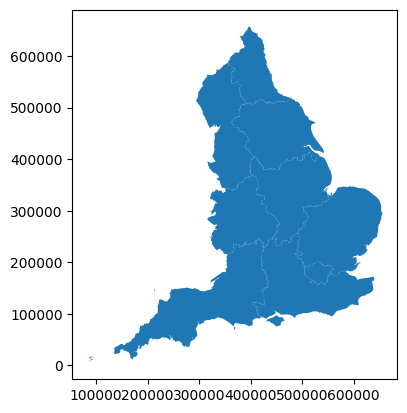

In [74]:
#plotting how it looks like
digimap_data_new.plot()

### Filtering the hull city from the whole region

In [75]:
digimap_data_hull_df = digimap_data_new[digimap_data_new['NAME'] == 'Yorkshire and the Humber English Region']
digimap_data_hull_df

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry
4,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2569,2569,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((424875.080 379990.440, 424872.170 37..."


In [76]:
digimap_data_hull_df["centriod"] = digimap_data_hull_df["geometry"].centroid

In [77]:
digimap_data_hull_df

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,geometry,centriod
4,Yorkshire and the Humber English Region,ER,English Region,YORKSHIRE_AND_THE_HUMBER_ENGLISH_REGION,2569,2569,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,"POLYGON ((424875.080 379990.440, 424872.170 37...",POINT (451323.465 452107.366)


<Axes: >

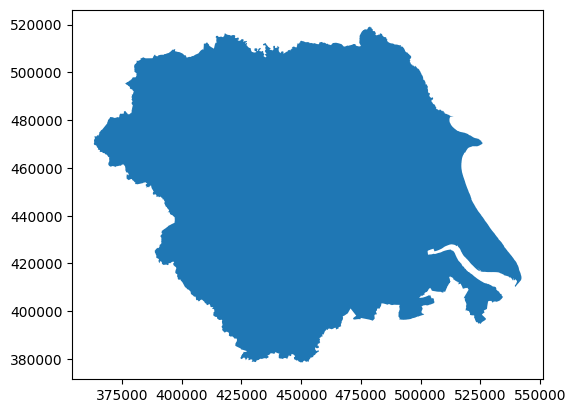

In [78]:
digimap_data_hull_df.plot()

### <span style="color:Red"> For census data, they are LSOA level, so you need to link census data to lsoa shp first, then you use spatial join to link the GDF_LSOA_CENSUS to GDF_GIRD_500, then you use groupby([girds_index].medium() to caculate the census info for each grid: that means if one gird intesected with three LSOAs in a case, you use the medium of ages of three LSOA to represent the age of this GRID !!!)</span>

### Merging all the data 

### Merging both boundary data , digimap data and osm data

In [79]:
# Writing a code that would measure all

target_crs = 'EPSG:4326'

hull_grid_all = hull_grid_all.to_crs(target_crs)
digimap_data_hull_df = digimap_data_hull_df.to_crs(target_crs)
osm_df = osm_df.to_crs(target_crs)

# Join digimap data and  boundary data
digi_grid_data = gpd.sjoin(hull_grid_all, digimap_data_hull_df, how="inner", op="intersects")

# Drop the extra columns added by the spatial join
digi_grid_data = digi_grid_data.drop(columns=['index_right'])

# Join the result with osm data
digi_grid_osm = gpd.sjoin(osm_df, digi_grid_data, how="inner", op="intersects")

# Drop the extra columns added by the spatial join
digi_grid_osm = digi_grid_osm.drop(columns=['index_right'])

digi_grid_osm

,osm_id,code,fclass,name_left,geometry,centroid,CELLCODE,EOFORIGIN,NOFORIGIN,lsoa21cd,...,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,TYPE_COD0,DESCRIPT1,DESCRIPT0,centriod
21,14472617,7201,forest,None,"POLYGON ((-0.41793 53.72311, -0.41733 53.72408...",POINT (-0.41571 53.72401),1kmE3635N3451,3635000,3451000,E01012884,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
21,14472617,7201,forest,None,"POLYGON ((-0.41793 53.72311, -0.41733 53.72408...",POINT (-0.41571 53.72401),1kmE3635N3451,3635000,3451000,E01012882,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
21,14472617,7201,forest,None,"POLYGON ((-0.41793 53.72311, -0.41733 53.72408...",POINT (-0.41571 53.72401),1kmE3636N3451,3636000,3451000,E01012882,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
21,14472617,7201,forest,None,"POLYGON ((-0.41793 53.72311, -0.41733 53.72408...",POINT (-0.41571 53.72401),1kmE3636N3451,3636000,3451000,E01012883,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
21,14472617,7201,forest,None,"POLYGON ((-0.41793 53.72311, -0.41733 53.72408...",POINT (-0.41571 53.72401),1kmE3636N3451,3636000,3451000,E01012886,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37917,1286686809,7204,industrial,None,"POLYGON ((-0.25459 53.77857, -0.25412 53.77857...",POINT (-0.25435 53.77843),1kmE3647N3455,3647000,3455000,E01012836,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
37917,1286686809,7204,industrial,None,"POLYGON ((-0.25459 53.77857, -0.25412 53.77857...",POINT (-0.25435 53.77843),1kmE3647N3455,3647000,3455000,E01012833,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
37917,1286686809,7204,industrial,None,"POLYGON ((-0.25459 53.77857, -0.25412 53.77857...",POINT (-0.25435 53.77843),1kmE3647N3455,3647000,3455000,E01012835,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)
37917,1286686809,7204,industrial,None,"POLYGON ((-0.25459 53.77857, -0.25412 53.77857...",POINT (-0.25435 53.77843),1kmE3647N3455,3647000,3455000,E01012839,...,124954,41430,E12000003,1556042.378,15220.12,SR,None,None,STATISTICAL REPORTING AREA,POINT (451323.465 452107.366)


In [80]:
digi_grid_osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10585 entries, 21 to 37917
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osm_id      10585 non-null  object  
 1   code        10585 non-null  int64   
 2   fclass      10585 non-null  object  
 3   name_left   1099 non-null   object  
 4   geometry    10585 non-null  geometry
 5   centroid    10585 non-null  geometry
 6   CELLCODE    10585 non-null  object  
 7   EOFORIGIN   10585 non-null  int64   
 8   NOFORIGIN   10585 non-null  int64   
 9   lsoa21cd    10585 non-null  object  
 10  lsoa21nm    10585 non-null  object  
 11  label       10585 non-null  object  
 12  name_right  10585 non-null  object  
 13  NAME        10585 non-null  object  
 14  AREA_CODE   10585 non-null  object  
 15  DESCRIPTIO  10585 non-null  object  
 16  FILE_NAME   10585 non-null  object  
 17  NUMBER      10585 non-null  int64   
 18  NUMBER0     10585 non-null  int64   
 19  

<Axes: >

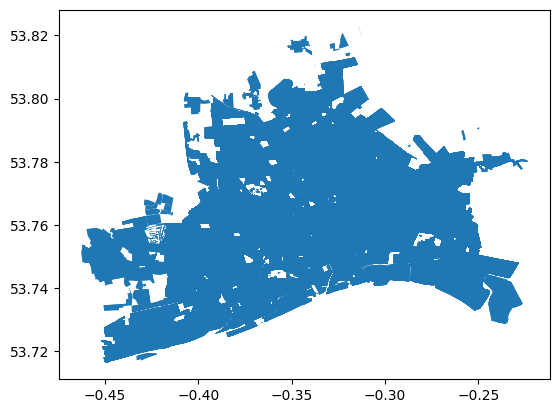

In [81]:
digi_grid_osm.plot()

### Merging the census data ,  police data as a single data

In [82]:
# concatenating the three dataframes
census_police_df = pd.concat([police_df , census_df])
census_police_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Age (6 categories),Economic activity status (7 categories) Code,Economic activity status (7 categories),Sex (2 categories) Code,Sex (2 categories),Observation,Ethnic group (20 categories) Code,Ethnic group (20 categories),Country of birth (13 categories) Code,Country of birth (13 categories)
2067,2f550856cc5f2cd3f07c4f0ebcea88b7814c90cddcf6e6...,2023-10,Humberside Police,Humberside Police,-0.335230,53.788680,On or near Davidstow Close,E01012785,Kingston upon Hull 002B,Burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2082,61d5f5d5ea565450d45842194651feb6b1e2a807efc8fe...,2023-10,Humberside Police,Humberside Police,-0.334913,53.794761,On or near Malpas Close,E01012786,Kingston upon Hull 002C,Burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2107,ab4cc558163d3d121d9648dc1c5004ebefeb458e7fb356...,2023-10,Humberside Police,Humberside Police,-0.321360,53.787408,On or near Hospital,E01012787,Kingston upon Hull 002D,Burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2108,bd8f8de44b71d53725e8f9777594a081a408e9dfb641e6...,2023-10,Humberside Police,Humberside Police,-0.321537,53.786413,On or near Shopping Area,E01012787,Kingston upon Hull 002D,Burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2109,154ee26b921a76ad24fb9c31cc2ede1af6c5cbcaf1386c...,2023-10,Humberside Police,Humberside Police,-0.322720,53.789863,On or near Dalwood Close,E01012787,Kingston upon Hull 002D,Burglary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,19.0,Other ethnic group: Any other ethnic group,8.0,Europe: Other Europe
2856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15.0,19.0,Other ethnic group: Any other ethnic group,9.0,Africa
2857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.0,19.0,Other ethnic group: Any other ethnic group,10.0,Middle East and Asia
2858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.0,19.0,Other ethnic group: Any other ethnic group,11.0,The Americas and the Caribbean


In [83]:
census_police_df.rename(columns={'LSOA code': 'lsoa21cd'}, inplace=True)

In [84]:
# checking the data types
census_police_df.dtypes

Crime ID                                         object
Month                                            object
Reported by                                      object
Falls within                                     object
Longitude                                       float64
Latitude                                        float64
Location                                         object
lsoa21cd                                         object
LSOA name                                        object
Crime type                                       object
Last outcome category                            object
Context                                         float64
Lower layer Super Output Areas Code              object
Lower layer Super Output Areas                   object
Age (6 categories) Code                         float64
Age (6 categories)                               object
Economic activity status (7 categories) Code    float64
Economic activity status (7 categories)         

### Merging all the data together as a crime data

In [85]:
# Step 3: Merge the GeoDataFrame and the pandas DataFrame on the common key
crime_df = digi_grid_osm.merge(census_police_df , on='lsoa21cd')

crime_df.to_csv("./data/all_data/crime_df.csv")

### <span style="color:Red"> You will first create a police data, with columns is GRID_index, Months, then merge the X as your final df for modelling</span>